In [2]:
#Importamos las librerias:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

### ETL + EDA

Se investigaran las siguientes tablas obtenidas en https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

1. Penetración del servicio de Internet fijo (métrica: hogares) <br>
2. Penetración del servicio de Internet fijo (métrica: población)<br>
3. Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)<br>
4. Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)<br>
5. Número de accesos al servicio de Internet fijo por tipo de tecnología. Total nacional (trimestral)
6. Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)<br>
7. Velocidad Media de bajada de Internet fijo<br>
8. Velocidad media de bajada de Internet fijo por provincia<br>
9. Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible)<br>
10. Acceso a Internet Fijo por rangos de velocidad de bajada y provincia<br>
11. Accesos a Internet fijo por velocidad bajada y provincia (sin rango)  <br>
12. Ingresos trimestrales de los operadores por el servicio de Internet fijo <br>
13. Número de accesos al servicio de Internet fijo por velocidad de bajada en cada localidad declarada <br>
14. Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría <br>
15. Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

1.1 ETL: Penetración del servicio de Internet fijo (métrica: hogares) <br>
    Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

In [3]:
data_1 = pd.read_csv('datasets/01-Internet_Penetracion.csv')
data_1.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


In [5]:
data_1.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                               0
Trimestre                         0
Provincia                         0
Accesos por cada 100 hogares      0
Unnamed: 4                      864
Unnamed: 5                      864
Unnamed: 6                      864
dtype: int64

In [6]:
#eliminamos las columnas que no tienen información
data_1_1 =data_1.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6'] )
#convertimos acceso por hogar en numerica
data_1_1['Accesos por cada 100 hogares'] = data_1_1['Accesos por cada 100 hogares'].str.replace(',', '.')
#recordar que en python el decimal va con punto
data_1_1['Accesos por cada 100 hogares'] = pd.to_numeric(data_1_1['Accesos por cada 100 hogares']) 

In [7]:
data_1_1.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [8]:
data_1_1['periodo'] = data_1_1['Año'].map(str) + '-' + data_1_1['Trimestre'].map(str)

In [9]:
data_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
 4   periodo                       864 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.9+ KB


In [10]:
data_1_1.shape

(864, 5)

In [11]:
#verificamos los valores de provincia
data_1_1['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [12]:
data_1_1['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [13]:
data_1_1['Trimestre'].unique()

array([4, 3, 2, 1], dtype=int64)

In [14]:
data_1_1.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


1.2 EDA: Penetración del servicio de Internet fijo (métrica: hogares)

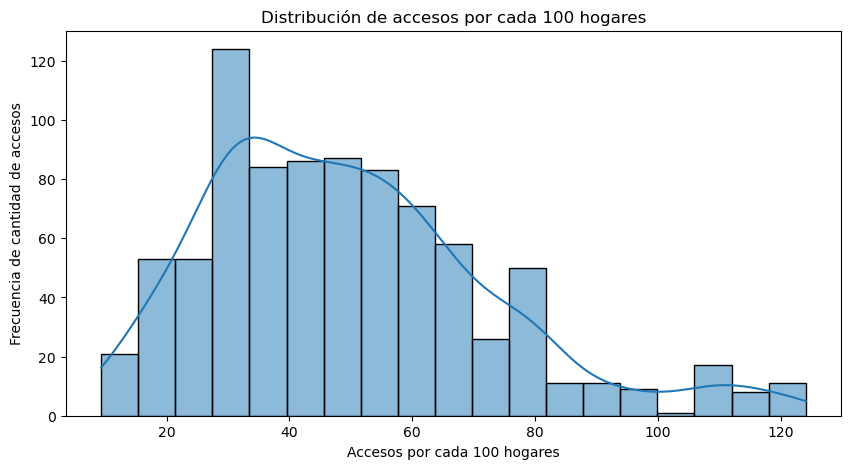

In [15]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

# Histograma
sns.histplot(x=data_1_1['Accesos por cada 100 hogares'], kde=True, ax=ax)
ax.set_title('Distribución de accesos por cada 100 hogares')
ax.set_ylabel('Frecuencia de cantidad de accesos')
ax.set_xlabel('Accesos por cada 100 hogares')

plt.show()

In [16]:
# Datos agrupados por Año
grouped_data = data_1_1.groupby('Año')
grouped_data['Accesos por cada 100 hogares'].describe()

,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2014,96.0,36.892083,21.789081,9.35,22.2075,30.720,49.3275,114.90
2015,96.0,39.198333,22.587402,9.71,26.2925,31.980,52.2650,118.29
2016,96.0,39.889792,22.997631,9.59,26.6825,32.115,53.3225,120.77
2017,96.0,42.525729,22.634444,9.51,28.8375,35.605,56.6050,124.06
2018,96.0,48.477500,20.551914,15.15,32.9050,41.720,62.3525,108.45
2019,96.0,53.666667,20.455662,23.67,37.6250,47.610,67.0625,112.65
2020,96.0,56.130625,18.206331,30.23,41.5850,52.775,69.1150,108.31
2021,96.0,61.978437,18.908952,32.73,45.5400,56.865,77.0075,111.27
2022,96.0,67.823542,20.345769,34.96,50.4650,63.800,80.6750,122.73


In [17]:
# Datos agrupados por Año
grouped_data_periodo = data_1_1.groupby('periodo')
grouped_data_periodo=grouped_data_periodo ['Accesos por cada 100 hogares'].describe()
grouped_data_periodo

,count,mean,std,min,25%,50%,75%,max
periodo,,,,,,,,
2014-1,24.0,36.195417,21.739198,9.35,21.9200,30.425,47.9950,112.25
2014-2,24.0,36.636250,21.919208,9.72,22.1750,30.740,48.7200,113.14
2014-3,24.0,37.342083,22.578861,9.71,22.3700,30.765,50.4575,113.80
2014-4,24.0,37.394583,22.295359,9.79,23.1375,31.085,50.3175,114.90
2015-1,24.0,38.509167,22.657387,9.72,26.0100,31.190,50.6675,114.90
2015-2,24.0,38.970417,22.912758,9.71,26.6650,31.475,51.6650,116.07
2015-3,24.0,39.644167,23.298753,9.71,27.1725,31.835,52.7625,118.29
2015-4,24.0,39.669583,22.915869,9.71,27.3050,32.040,53.7975,118.13
2016-1,24.0,38.922500,22.310240,9.59,26.6300,31.720,52.2800,115.16


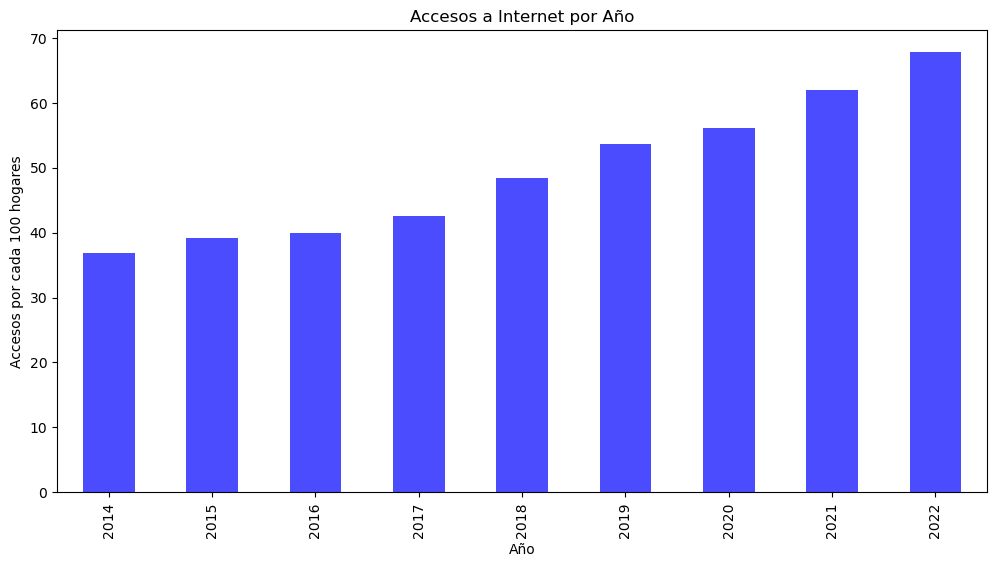

In [18]:
# agrupo por año y calculo la media de accesos por cada 100 hogares
data_1_1_año = data_1_1.groupby("Año")["Accesos por cada 100 hogares"].mean()


fig, ax = plt.subplots(ncols=1, figsize=(12, 6))

# crear el gráfico de barras
ax = data_1_1_año.plot(kind='bar', color='blue', alpha=0.7)

# ajustar las etiquetas del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Accesos a Internet por Año')

# mostrar el gráfico
plt.show()

In [19]:

design_report = ProfileReport(data_1_1)
design_report.to_file(output_file='data_1_1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
grouped_data_provincia = data_1_1.groupby('Provincia')
grouped_data_provincia2=grouped_data_provincia['Accesos por cada 100 hogares'].describe()
grouped_data_provincia2


,count,mean,std,min,25%,50%,75%,max
Provincia,,,,,,,,
Buenos Aires,36.0,63.979444,7.284404,54.57,57.5425,63.515,69.0125,78.94
Capital Federal,36.0,113.639167,5.798388,105.98,108.4075,112.450,118.7275,124.06
Catamarca,36.0,36.737500,13.182140,24.25,25.9625,32.210,47.5950,65.77
Chaco,36.0,33.472778,7.504517,20.72,28.5300,31.765,41.8950,44.06
Chubut,36.0,53.114444,17.444900,35.55,37.4300,47.280,68.3425,88.05
Corrientes,36.0,35.597778,7.798254,22.32,30.5200,34.030,41.9200,51.64
Córdoba,36.0,66.986111,11.428026,52.52,57.5025,63.880,75.9350,89.03
Entre Ríos,36.0,51.164444,9.308457,34.37,44.5825,49.710,58.5100,64.01
Formosa,36.0,26.581389,7.837995,17.42,19.0625,29.505,32.0550,43.76


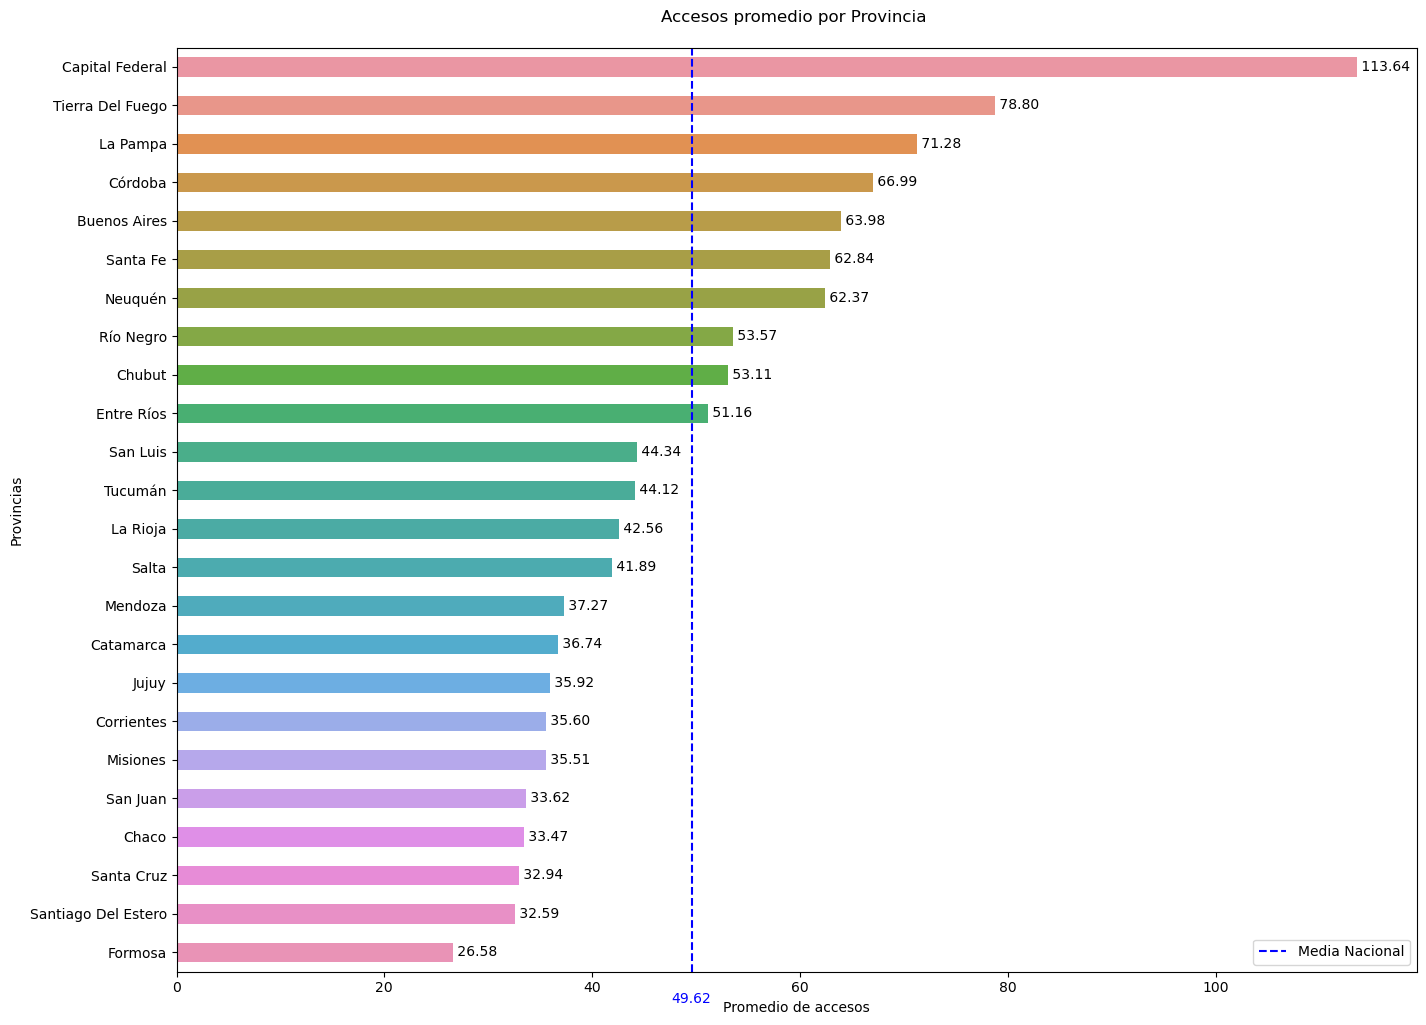

In [21]:
# Gráfico de barras de accesos promedios
# Agrupamos el dataframe respecto a las provincias
accesos_por_provincia = data_1_1.groupby(by='Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)
# Sacamos el promedio general
promedio_general = data_1_1['Accesos por cada 100 hogares'].mean()

# Gráfico de barras de accesos promedios
plt.figure(figsize=(16,12))
plt.title('Accesos promedio por Provincia \n')
sns.barplot(y=accesos_por_provincia.index, x=accesos_por_provincia, width=0.5)
plt.xlabel("Promedio de accesos")
plt.ylabel("Provincias")
# Agregamos los valores promedio a cada barra
for i, value in enumerate(accesos_por_provincia):
    plt.text(value, i, f' {value:.2f}', ha='left', va='center')

# Agregamos una barra vertical con el promedio general
plt.axvline(x=promedio_general, color="blue", linestyle="--", label="Media Nacional")
plt.text(promedio_general - 2, len(accesos_por_provincia) + 0.3, f'{promedio_general:.2f}', color='blue')

plt.legend()

plt.show()

In [22]:
grouped_data_provincia_año = data_1_1.groupby(['Provincia','Año'])
grouped_data_provincia2_año=grouped_data_provincia_año['Accesos por cada 100 hogares'].describe()

In [23]:
grouped_data_provincia2_año.head(50)

count      mean       std     min       25%      50%  \
Provincia       Año                                                          
Buenos Aires    2014    4.0   55.6175  0.985541   54.57   54.9375   55.575   
                2015    4.0   57.2875  0.865347   56.37   56.6925   57.245   
                2016    4.0   59.5150  1.645955   57.34   58.8400   59.740   
                2017    4.0   57.0200  1.322271   55.63   56.1100   56.940   
                2018    4.0   63.6125  1.051709   62.63   62.7425   63.610   
                2019    4.0   66.9250  2.191628   64.25   65.7425   67.045   
                2020    4.0   66.5475  2.147423   64.33   64.9975   66.440   
                2021    4.0   71.6125  2.901119   69.11   69.7775   70.840   
                2022    4.0   77.6775  1.203117   76.08   77.2050   77.845   
Capital Federal 2014    4.0  113.5225  1.116553  112.25  112.9175  113.470   
                2015    4.0  116.8475  1.645486  114.90  115.7775  117.100   
                2016    4.0  119.1500  2.678743  115.16  118.8200  120.335   
                2017    4.0  119.2975  7.340211  108.37  118.4875  122.380   
                2018    4.0  107.3725  1.148749  106.24  106.4575  107.400   
                2019    4.0  109.6625  2.681534  106.25  108.4625  109.875   
                2020    4.0  107.0950  1.084881  105.98  106.3025  107.045   
                2021    4.0  110.2750  1.346514  108.42  109.7100  110.705   
                2022    4.0  119.5300  5.187286  111.80  118.9325  121.795   
Catamarca       2014    4.0   24.7925  0.524238   24.25   24.5875   24.705   
                2015    4.0   25.6650  0.490884   25.11   25.3650   25.655   
                2016    4.0   26.2500  0.308221   25.91   26.0300   26.275   
                2017    4.0   28.1875  3.160162   25.66   25.9000   27.300   
                2018    4.0   32.7000  0.317805   32.23   32.6500   32.825   
                2019    4.0   32.9100  2.429582   30.88   31.8175   32.160   
                2020    4.0   44.9050  5.122724   37.62   43.4775   46.295   
                2021    4.0   52.3000  2.609738   48.90   51.4800   52.525   
                2022    4.0   62.9275  3.482570   58.21   61.3525   63.865   
Chaco           2014    4.0   21.1650  0.496689   20.72   20.9000   21.035   
                2015    4.0   27.6050  0.733508   26.65   27.2575   27.710   
                2016    4.0   28.5925  0.366276   28.08   28.4625   28.690   
                2017    4.0   29.6150  0.978179   28.62   28.9425   29.515   
                2018    4.0   31.7375  0.833122   30.83   31.1450   31.765   
                2019    4.0   34.8675  1.857155   32.64   33.7650   34.995   
                2020    4.0   40.4700  2.383848   37.48   39.2425   40.685   
                2021    4.0   43.3700  0.477842   42.96   43.0950   43.235   
                2022    4.0   43.8325  0.182094   43.62   43.7475   43.825   
Chubut          2014    4.0   40.8750  0.543354   40.25   40.5125   40.920   
                2015    4.0   36.9725  0.444850   36.58   36.7525   36.850   
                2016    4.0   36.1150  0.047958   36.07   36.0850   36.105   
                2017    4.0   42.2225  7.935155   35.55   35.6325   40.940   
                2018    4.0   51.9050  6.292231   42.61   50.9425   54.310   
                2019    4.0   47.1775  3.337738   43.00   45.9925   47.280   
                2020    4.0   61.3250  8.476322   51.27   55.8225   62.840   
                2021    4.0   76.1400  6.536431   68.99   71.4650   76.500   
                2022    4.0   85.2975  2.076365   83.19   84.0825   84.975   
Corrientes      2014    4.0   22.8125  0.534127   22.32   22.5150   22.685   
                2015    4.0   29.7600  0.630608   28.95   29.4225   29.875   
                2016    4.0   30.6775  0.451691   30.08   30.4550   30.780   
                2017    4.0   31.7550  0.719931   30.94   31.2775   31.780   
                2018    4.0   33.8225  0.835

In [24]:
#se guarda la tabla para Power BI
tabla_1_1 = "tabla_1.csv"
data_1_1.to_csv(tabla_1_1, index=False, encoding="utf-8")

**Conclusiones**

- Sin considerar los años la media es de acceso por cada 100 hogares es de 49.62 . 
- A medida que avanza el tiempo, el acceso promedio por año se incrementa, siendo 36 en el 2014 y 67 en el 2022 por cada 100 hogares.
- La provincia con mayor acceso a internet es Capital Federal, seguida por Tierra del Fuego y la Pampa


2.1 ETL: Penetración del servicio de Internet fijo (métrica: poblacion) <br>
    Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares

In [36]:
data_2 = pd.read_csv('datasets/02-Internet_Penetracion.csv')
data_2.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [37]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [38]:
#convertimos acceso por hogar en numerica
data_2['Accesos por cada 100 hogares'] = data_2['Accesos por cada 100 hogares'].str.replace(',', '.')
#recordar que en python el decimal va con punto
data_2['Accesos por cada 100 hogares'] = pd.to_numeric(data_2['Accesos por cada 100 hogares']) 

#convertimos acceso por hogar en numerica
data_2['Accesos por cada 100 hab'] = data_2['Accesos por cada 100 hab'].str.replace(',', '.')
#recordar que en python el decimal va con punto
data_2['Accesos por cada 100 hab'] = pd.to_numeric(data_2['Accesos por cada 100 hab']) 


In [39]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [40]:
data_2['periodo'] = data_2['Año'].map(str) + '-' + data_2['Trimestre'].map(str)

In [41]:
data_2.tail(10)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo,periodo
26,2016,2,53.34,16.37,Abr-Jun 2016,2016-2
27,2016,1,51.85,15.90,Ene-Mar 2016,2016-1
28,2015,4,52.63,16.12,Oct-Dic 2015,2015-4
29,2015,3,52.46,16.05,Jul-Sept 2015,2015-3
30,2015,2,51.76,15.82,Abr-Jun 2015,2015-2
31,2015,1,51.36,15.68,Ene-Mar 2015,2015-1
32,2014,4,50.50,15.39,Oct-Dic 2014,2014-4
33,2014,3,50.67,15.43,Jul-Sept 2014,2014-3
34,2014,2,49.86,15.16,Abr-Jun 2014,2014-2
35,2014,1,49.55,15.05,Ene-Mar 2014,2014-1


In [42]:
data_2.shape

(36, 6)

In [43]:
data_2.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
periodo                         0
dtype: int64

In [44]:
data_2 =data_2.drop(columns=['Periodo'] )

In [45]:
tabla_2_1 = "tabla_2.csv"
data_2.to_csv(tabla_2_1, index=False, encoding="utf-8")

2.2 EDA: Penetración del servicio de Internet fijo (métrica: poblacion) <br>

In [46]:
data_2.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,60.745833,18.760278
std,2.618615,1.133893,8.513140,2.782531
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.750000,53.162500,16.307500
50%,2018.000000,2.500000,59.925000,18.485000
75%,2020.000000,3.250000,66.637500,20.695000
max,2022.000000,4.000000,77.210000,24.150000


In [47]:
#verifico si coincide en algo con la tabla anterior,
grouped_data_periodo=grouped_data_periodo.reset_index()


In [48]:
data_2_1=data_2.sort_values(['Año', 'Trimestre']).reset_index()
data_2_1.columns

Index(['index', 'Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'periodo'],
      dtype='object')

In [51]:
grouped_data_periodo.head(2)

,periodo,count,mean,std,min,25%,50%,75%,max
0,2014-1,24.0,36.195417,21.739198,9.35,21.920,30.425,47.995,112.25
1,2014-2,24.0,36.636250,21.919208,9.72,22.175,30.740,48.720,113.14


In [52]:
data_2_1.head(2)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,periodo
0,2014,1,49.55,15.05,2014-1
1,2014,2,49.86,15.16,2014-2


In [53]:
data_2_1.tail(2)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,periodo
34,2022,3,76.64,23.95,2022-3
35,2022,4,77.21,24.15,2022-4


In [54]:
analisis_penetracion= pd.concat([data_2_1, grouped_data_periodo], axis=1)
analisis_penetracion.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,periodo,periodo,count,mean,std,min,25%,50%,75%,max
0,2014,1,49.55,15.05,2014-1,2014-1,24.0,36.195417,21.739198,9.35,21.9200,30.425,47.9950,112.25
1,2014,2,49.86,15.16,2014-2,2014-2,24.0,36.636250,21.919208,9.72,22.1750,30.740,48.7200,113.14
2,2014,3,50.67,15.43,2014-3,2014-3,24.0,37.342083,22.578861,9.71,22.3700,30.765,50.4575,113.80
3,2014,4,50.50,15.39,2014-4,2014-4,24.0,37.394583,22.295359,9.79,23.1375,31.085,50.3175,114.90
4,2015,1,51.36,15.68,2015-1,2015-1,24.0,38.509167,22.657387,9.72,26.0100,31.190,50.6675,114.90


In [55]:
analisis_penetracion.shape

(36, 14)

In [56]:
analisis_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   periodo                       36 non-null     object 
 5   periodo                       36 non-null     object 
 6   count                         36 non-null     float64
 7   mean                          36 non-null     float64
 8   std                           36 non-null     float64
 9   min                           36 non-null     float64
 10  25%                           36 non-null     float64
 11  50%                           36 non-null     float64
 12  75%                           36 non-null     float64
 13  max    

In [57]:
analisis_penetracion["dif 1"] = analisis_penetracion["Accesos por cada 100 hogares"] - analisis_penetracion["mean"].shift(-1)
analisis_penetracion["dif 2"] = analisis_penetracion["Accesos por cada 100 hogares"] - analisis_penetracion["min"].shift(-1)
analisis_penetracion["dif 3"] = analisis_penetracion["Accesos por cada 100 hogares"] - analisis_penetracion["50%"].shift(-1)
analisis_penetracion["dif 4"] = analisis_penetracion["Accesos por cada 100 hogares"] - analisis_penetracion["max"].shift(-1)

In [58]:
analisis_penetracion.head(2)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,periodo,periodo,count,mean,std,min,25%,50%,75%,max,dif 1,dif 2,dif 3,dif 4
0,2014,1,49.55,15.05,2014-1,2014-1,24.0,36.195417,21.739198,9.35,21.920,30.425,47.995,112.25,12.913750,39.83,18.810,-63.59
1,2014,2,49.86,15.16,2014-2,2014-2,24.0,36.636250,21.919208,9.72,22.175,30.740,48.720,113.14,12.517917,40.15,19.095,-63.94


Obs: La información de la tabla 2, no es la misma que la tabla 1, seguramente es un promedio, sin considerar algunas provincias

In [62]:
accesos_por_año = data_2_1[['periodo' ,'Accesos por cada 100 hab']]
accesos_por_año = accesos_por_año.set_index('periodo')
accesos_por_año.columns

Index(['Accesos por cada 100 hab'], dtype='object')

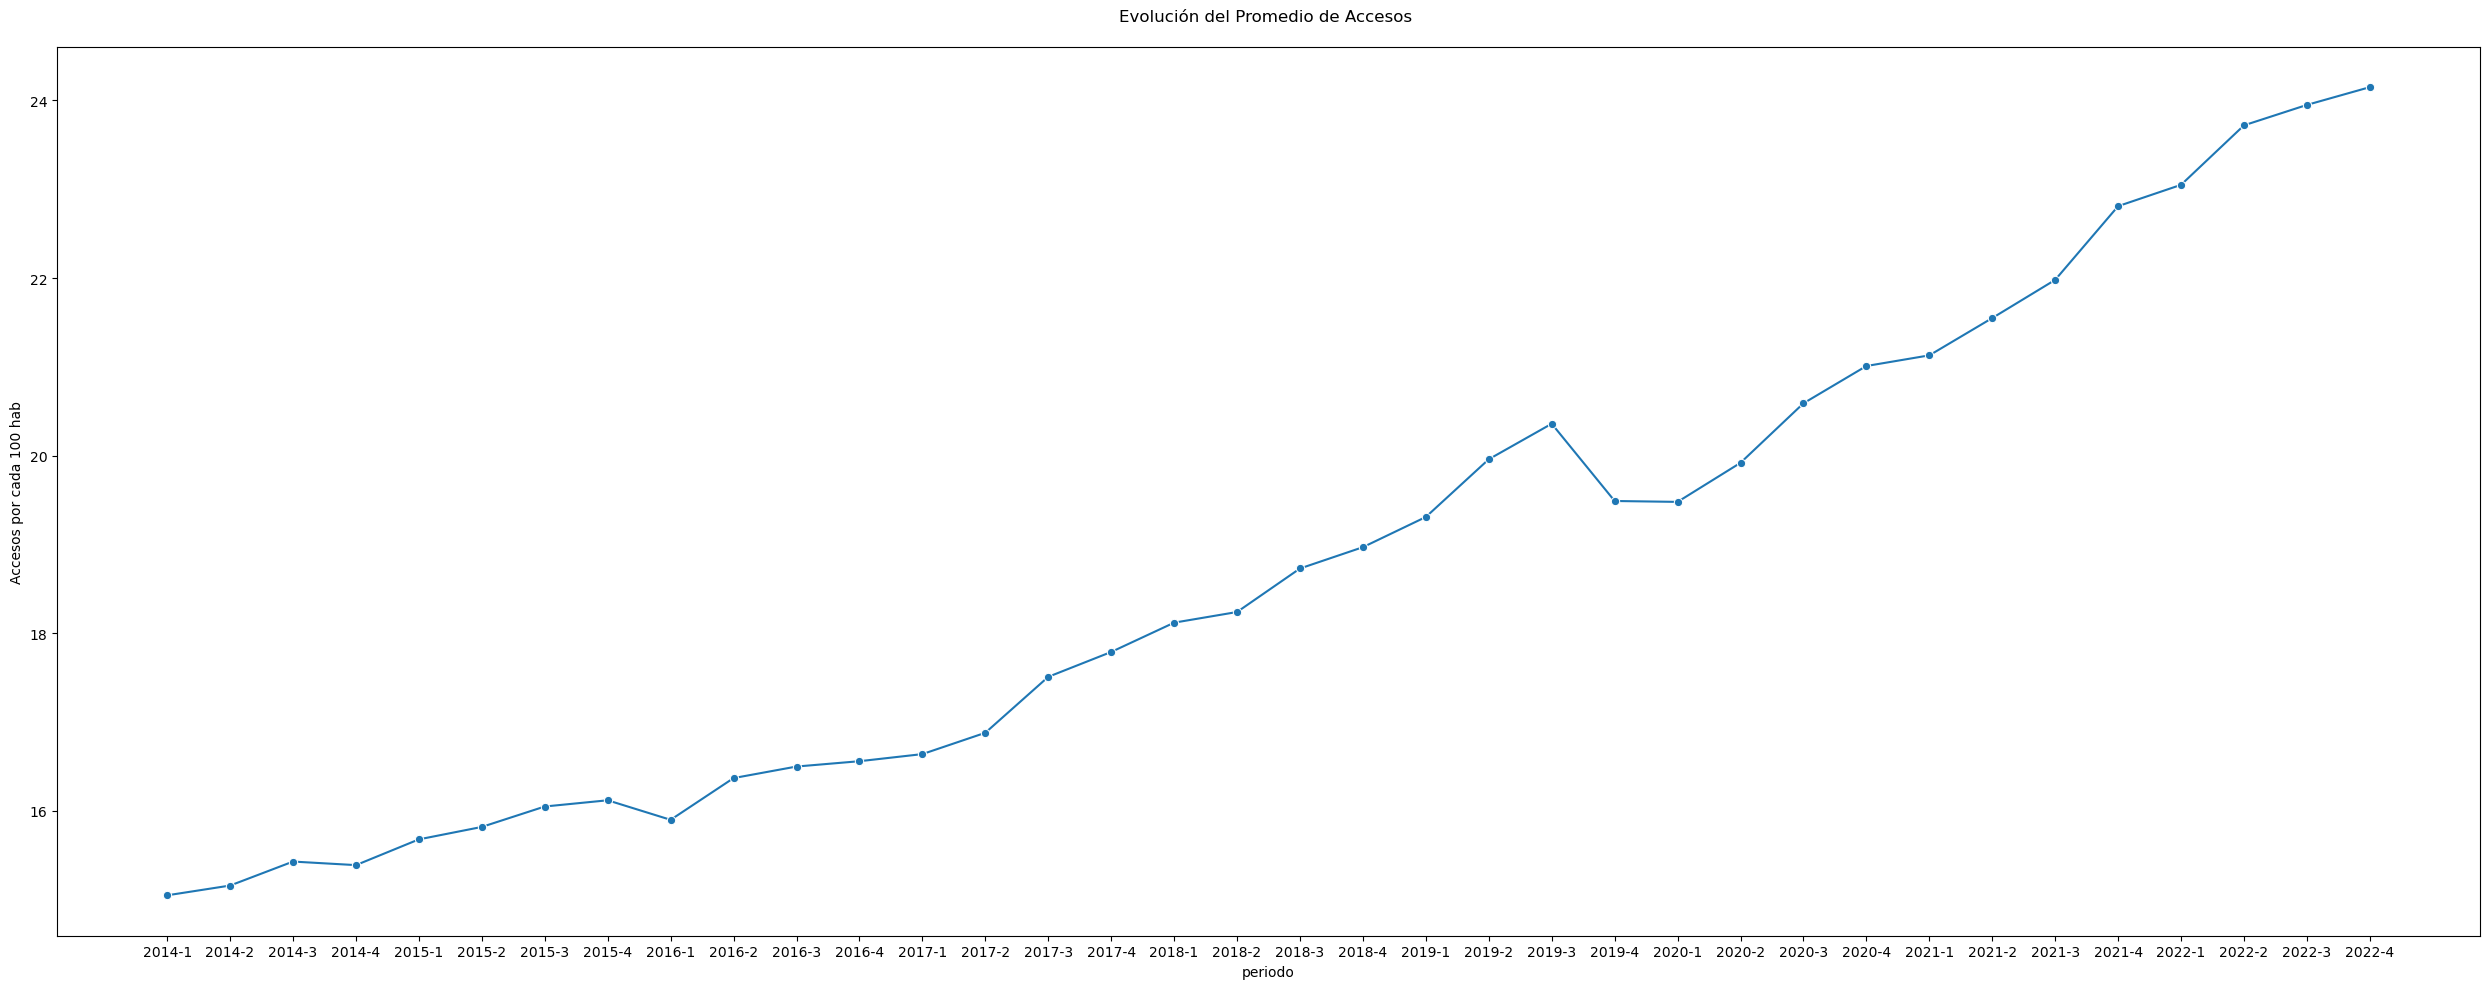

In [63]:
# gráfico de línea de evolución del promedio de accesos por año
plt.figure(figsize=(25,10))
sns.lineplot(x=accesos_por_año.index, y=accesos_por_año['Accesos por cada 100 hab'], marker='o')
plt.title("Evolución del Promedio de Accesos \n")
plt.tight_layout()
plt.show()

**Conclusiones**

- Se debe entender como se calcula el indicador de acceso por cada 100 habitantes, ya que un hogar contiene más de una persona, por lo cual si comparo ambas variables, se podria decir que en caso de un hogar de 4 habitantes, solo 1 tiene acceso a internet.
Por ejemplo, el ultimo cuatrimestre 2022, por cada 100 hogares, 77 tienen acceso. Pero, por cada 100 habitantes, solo acceden 15 personas, entonces se podria decir que por hogar se calcula 5 habitantes.

- Por otro lado tambien se puede decir a medida que pasa el tiempo, aumente el acceso a internet, a excepción entre el 2019/4 que se presenta una caida. 

3.1 ETL:  Total nacional de accesos a Internet fijo por banda ancha y banda angosta  <br>
Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [64]:
data_3 = pd.read_csv('datasets/03-Internet_BAF.csv')
data_3.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


In [65]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [66]:
data_3['periodo'] = data_3['Año'].map(str) + '-' + data_3['Trimestre'].map(str)

In [67]:
data_3.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
periodo             0
dtype: int64

3.2 EDA:  Total nacional de accesos a Internet fijo por banda ancha y banda angosta  <br>

In [68]:
data_3.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,8.361111,23.083333,8.361111
std,2.618615,1.133893,1.495761,10.171037,1.495761
min,2014.000000,1.000000,6.000000,10.000000,6.000000
25%,2016.000000,1.750000,7.000000,12.000000,7.000000
50%,2018.000000,2.500000,8.000000,27.000000,8.000000
75%,2020.000000,3.250000,9.250000,32.250000,9.250000
max,2022.000000,4.000000,11.000000,39.000000,11.000000


Solo hay un dato puntual por trimestre , total es igual que banda ancha fija

Dial-Up: son conexiones que se realizan a través de una llamada telefónica local utilizando un aparato denominado módem o modulador/demodulador.

Banda ancha: por lo general, en este tipo de conexión los usuarios tienen acceso permanente a Internet, aunque recientemente se han incorporado modalidades de contratación limitados a determinadas bandas horarias. El abonado a este tipo de servicio no paga pulsos telefónicos. Entre las modalidades del mismo pueden señalarse: DLS, Cablemodem, Wifi, lineas punto a punto

OBS: Volvemos a importar, porque los datos son millones de usuario y al importar el csv solo trae 11, directamente truncado

In [69]:
data_3_1 = pd.read_excel('datasets/03.1-Internet_BAF.xlsx',sheet_name='Totales')
data_3_1.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022
3,2022,1,10611390,12619,10624009,Ene-Mar 2022
4,2021,4,10476933,12861,10489794,Oct-Dic 2021


Ahora si, en el 2022/4 hay 11.195.668 usuarios con banda ancha fija, y 12.446 internet con linea baja, se esperaría que a medida que pasa el tiempo la banda ancha aumenta y disminuye el dial up

In [70]:
data_3_1.shape

(36, 6)

In [71]:
data_3_1["dif"] = data_3_1['Banda ancha fija'].diff().shift(-1)*(-1)
data_3_1["var_banda_ancha"] = data_3_1.dif/data_3_1['Banda ancha fija'].shift(-1)*100

data_3_1["dif2"] = data_3_1['Dial up'].diff().shift(-1)*(-1)
data_3_1["var_banda_dial"] = data_3_1.dif2/data_3_1['Dial up'].shift(-1)*100

data_3_1["dif3"] = data_3_1['Total'].diff().shift(-1)*(-1)
data_3_1["var_total"] = data_3_1.dif3/data_3_1['Total'].shift(-1)*100

data_3_1['periodo'] = data_3_1['Año'].map(str) + '-' + data_3['Trimestre'].map(str)

data_3_2 =data_3_1.drop(columns=['dif','dif2','dif3'] )

In [74]:
data_3_2.head(3)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo,var_banda_ancha,var_banda_dial,var_total,periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022,1.055874,0.072365,1.054771,2022-4
1,2022,3,11078691,12437,11091128,Jul-Sept 2022,1.209940,0.008041,1.208576,2022-3
2,2022,2,10946248,12436,10958684,Abr-Jun 2022,3.155647,-1.450194,3.150176,2022-2


In [75]:
#guardo la tabla para usarlo en power bi
tabla_3_1 = "tabla_3.csv"
data_3_2.to_csv(tabla_3_1, index=False, encoding="utf-8")


In [73]:
#Continuo nuevamente con el EDA
data_3_3=data_3_2.sort_values(['Año', 'Trimestre']).reset_index()

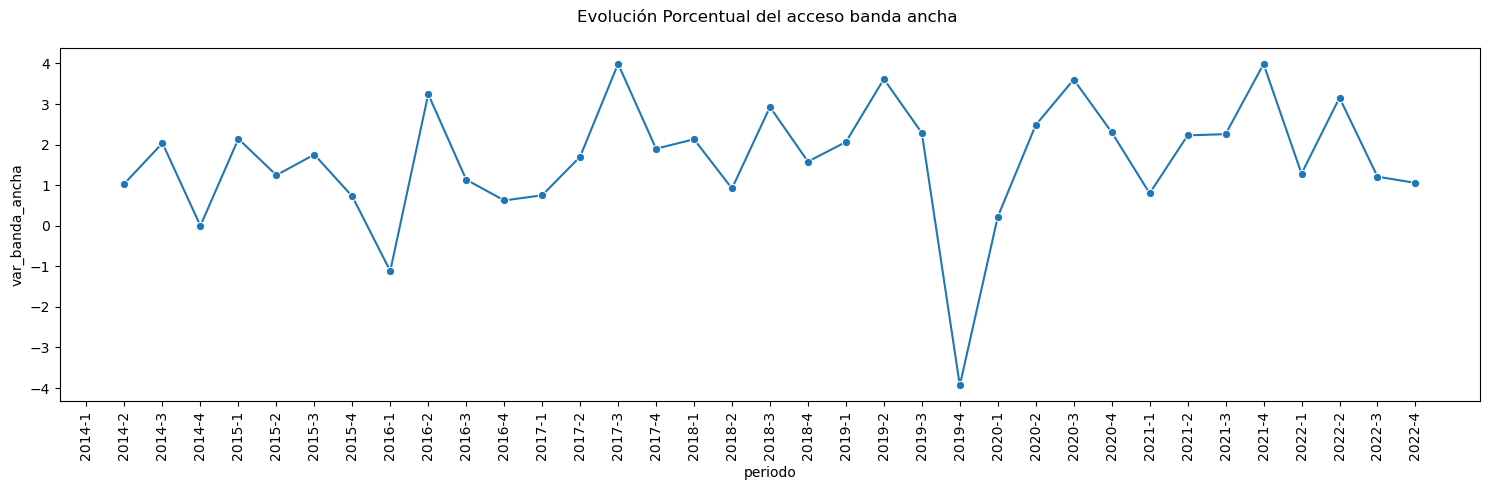

In [78]:
crecimiento = data_3_3[['periodo' ,'var_banda_ancha']]
crecimiento = crecimiento.set_index('periodo')

# gráfico de línea de evolución del promedio de accesos por año
plt.figure(figsize=(15,5))
sns.lineplot(x=crecimiento.index, y=crecimiento['var_banda_ancha'], marker='o')
plt.xticks(rotation= 90)
plt.title("Evolución Porcentual del acceso banda ancha \n")
plt.tight_layout()
plt.show()

In [79]:
data_3_2.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total,var_banda_ancha,var_banda_dial,var_total
count,36.000000,36.000000,3.600000e+01,36.000000,3.600000e+01,35.000000,35.000000,35.000000
mean,2018.000000,2.500000,8.355563e+06,23079.555556,8.378642e+06,1.638878,-2.200097,1.625753
std,2.618615,1.133893,1.471390e+06,10107.978375,1.462265e+06,1.507422,10.956147,1.518073
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06,-3.935714,-53.526362,-4.053637
25%,2016.000000,1.750000,7.061275e+06,12436.750000,7.093767e+06,0.979560,-1.354087,0.972880
50%,2018.000000,2.500000,8.201878e+06,26861.500000,8.228740e+06,1.754137,-0.328178,1.744083
75%,2020.000000,3.250000,9.400024e+06,32491.750000,9.410040e+06,2.295880,-0.000000,2.292087
max,2022.000000,4.000000,1.119567e+07,39324.000000,1.120811e+07,3.992091,24.176885,4.008243


In [80]:
grouped_crecimiento_usuario = data_3_2.groupby(['Año'])
grouped_crecimiento_usuario2=grouped_crecimiento_usuario['Banda ancha fija'].describe()
grouped_crecimiento_usuario2

,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2014,4.0,6477218.25,98469.031769,6362108.0,6411773.75,6493750.5,6559195.00,6559264.0
2015,4.0,6834387.25,114393.211624,6699714.0,6762387.75,6842773.0,6914772.50,6952289.0
2016,4.0,7093444.00,154800.693228,6874704.0,7041879.00,7137972.0,7189537.00,7223128.0
2017,4.0,7554455.00,260543.093411,7277314.0,7370179.00,7548864.0,7733140.00,7842778.0
2018,4.0,8216394.50,205324.233786,8009981.0,8065145.00,8201878.0,8353127.50,8451841.0
2019,4.0,8872673.50,220651.628092,8626323.0,8743870.50,8860740.0,8989543.00,9142891.0
2020,4.0,9182801.00,337138.135896,8802435.0,8966388.75,9183611.5,9400023.75,9561546.0
2021,4.0,10010693.75,358437.746305,9637956.0,9799015.50,9963943.0,10175621.25,10476933.0
2022,4.0,10957999.25,252539.764068,10611390.0,10862533.50,11012469.5,11107935.25,11195668.0


**Conclusión**

-  El crecimiento de la cantidad de usuarios por trimestres va entre 0 a 3% sostenido, a pesar de algunos meses puntuales de caida,
la tendecia es un crecimiento sostenido en banda ancha.

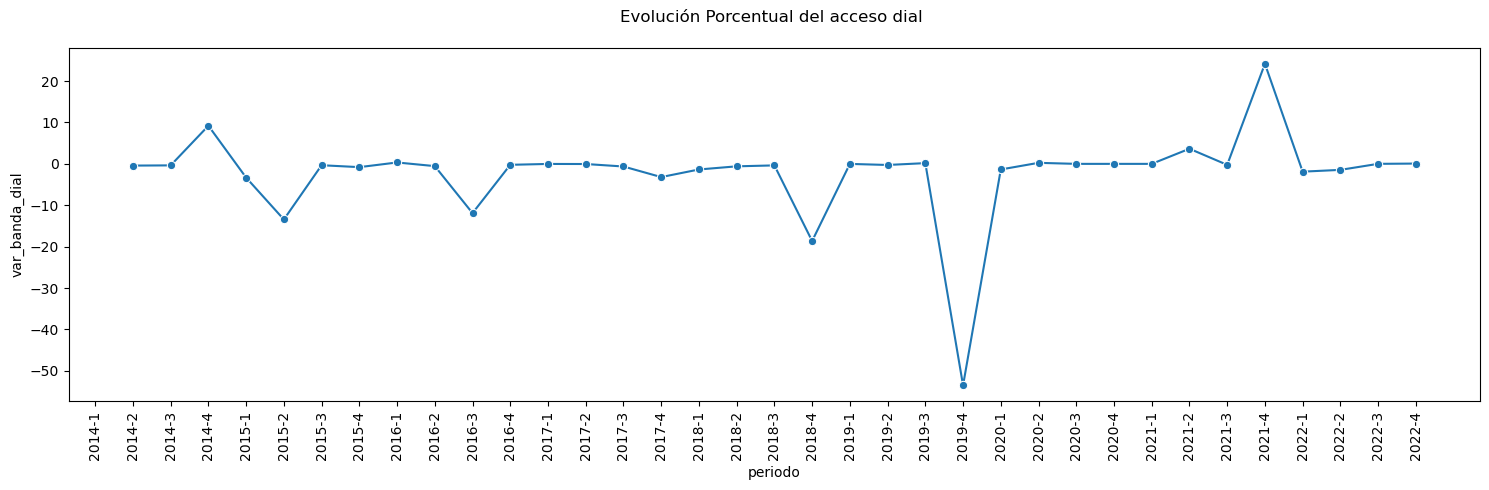

In [81]:
crecimiento2 = data_3_3[['periodo' ,'var_banda_dial']]
crecimiento2 = crecimiento2.set_index('periodo')


# gráfico de línea de evolución del promedio de accesos por año
plt.figure(figsize=(15,5))
sns.lineplot(x=crecimiento2.index, y=crecimiento2['var_banda_dial'], marker='o')
plt.xticks(rotation= 90)
plt.title("Evolución Porcentual del acceso dial \n")
plt.tight_layout()
plt.show()

**Conclusión**

- Como es de esperarse el crecimiento del dial es minimo ante la presencia de banda ancha, y en el 2019, paso de 21.793 a 10.128 usuarios. 

4.1 ETL- Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)<br>

In [82]:
data_4 = pd.read_excel('datasets/03.1-Internet_BAF.xlsx',sheet_name='Dial-BAf')
data_4.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [83]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [84]:
data_4.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

In [85]:
data_4['periodo'] = data_4['Año'].map(str) + '-' + data_4['Trimestre'].map(str)

In [86]:
data_4.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,8.640000e+02,862.000000,8.640000e+02
mean,2018.000000,2.500000,3.481485e+05,963.879350,3.491101e+05
std,2.583484,1.118682,7.476219e+05,2397.370177,7.494854e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.750000,5.221525e+04,9.000000,5.232900e+04
50%,2018.000000,2.500000,1.044120e+05,148.000000,1.045965e+05
75%,2020.000000,3.250000,1.791568e+05,619.000000,1.801745e+05
max,2022.000000,4.000000,4.788466e+06,15229.000000,4.794665e+06


4.2 EDA- Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)<br>

Vamos a tratar de analizar donde fue el mayor crecimiento de internet por provincia

In [87]:
data_4_1=data_4.sort_values(['Provincia','Año', 'Trimestre'], ascending=False).reset_index()
data_4_1.head(15)

,index,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,periodo
0,23,2022,4,Tucumán,263392,30.0,263422,2022-4
1,47,2022,3,Tucumán,263087,30.0,263117,2022-3
2,71,2022,2,Tucumán,254497,30.0,254527,2022-2
3,95,2022,1,Tucumán,245554,30.0,245584,2022-1
4,119,2021,4,Tucumán,238609,30.0,238639,2021-4
5,143,2021,3,Tucumán,232447,25.0,232472,2021-3
6,167,2021,2,Tucumán,233026,25.0,233051,2021-2
7,191,2021,1,Tucumán,231890,22.0,231912,2021-1
8,215,2020,4,Tucumán,231067,22.0,231089,2020-4
9,239,2020,3,Tucumán,223854,22.0,223876,2020-3


In [88]:
data_4_1["dif"] = data_4_1['Banda ancha fija'].diff().shift(-1)*(-1)
data_4_1["var_banda_ancha"] = data_4_1.dif/data_4_1['Banda ancha fija'].shift(-1)*100
data_4_1["Provincia2"]=data_4_1['Provincia'].shift(-1)
data_4_1.loc[data_4_1['Provincia2'] != data_4_1['Provincia'], 'var_banda_ancha'] = 0 
data_4_1.head(40)
#Hago esto porque el calculo del porcentaje, cuando termina una provincia y empieza otra deberia ser cero,
#entonces ahora podemos comparar bien

,index,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,periodo,dif,var_banda_ancha,Provincia2
0,23,2022,4,Tucumán,263392,30.0,263422,2022-4,305.0,0.115931,Tucumán
1,47,2022,3,Tucumán,263087,30.0,263117,2022-3,8590.0,3.375285,Tucumán
2,71,2022,2,Tucumán,254497,30.0,254527,2022-2,8943.0,3.641969,Tucumán
3,95,2022,1,Tucumán,245554,30.0,245584,2022-1,6945.0,2.910619,Tucumán
4,119,2021,4,Tucumán,238609,30.0,238639,2021-4,6162.0,2.650927,Tucumán
5,143,2021,3,Tucumán,232447,25.0,232472,2021-3,-579.0,-0.248470,Tucumán
6,167,2021,2,Tucumán,233026,25.0,233051,2021-2,1136.0,0.489887,Tucumán
7,191,2021,1,Tucumán,231890,22.0,231912,2021-1,823.0,0.356174,Tucumán
8,215,2020,4,Tucumán,231067,22.0,231089,2020-4,7213.0,3.222189,Tucumán
9,239,2020,3,Tucumán,223854,22.0,223876,2020-3,6720.0,3.094863,Tucumán


In [89]:
data_4_2 =data_4_1.drop(columns=['dif','Provincia2'] )

In [91]:
data_4_2.head(2)

,index,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,periodo,var_banda_ancha
0,23,2022,4,Tucumán,263392,30.0,263422,2022-4,0.115931
1,47,2022,3,Tucumán,263087,30.0,263117,2022-3,3.375285


In [92]:
#guardo para usar en power bi
tabla_4_1 = "tabla_4.csv"
data_4_2.to_csv(tabla_4_1, index=False, encoding="utf-8")

In [90]:
crecimiento3 = data_4_2[['periodo','var_banda_ancha','Provincia']].sort_values('periodo').reset_index()
crecimiento3.head(2)

,index,periodo,var_banda_ancha,Provincia
0,431,2014-1,0.0,Mendoza
1,107,2014-1,0.0,Santiago Del Estero


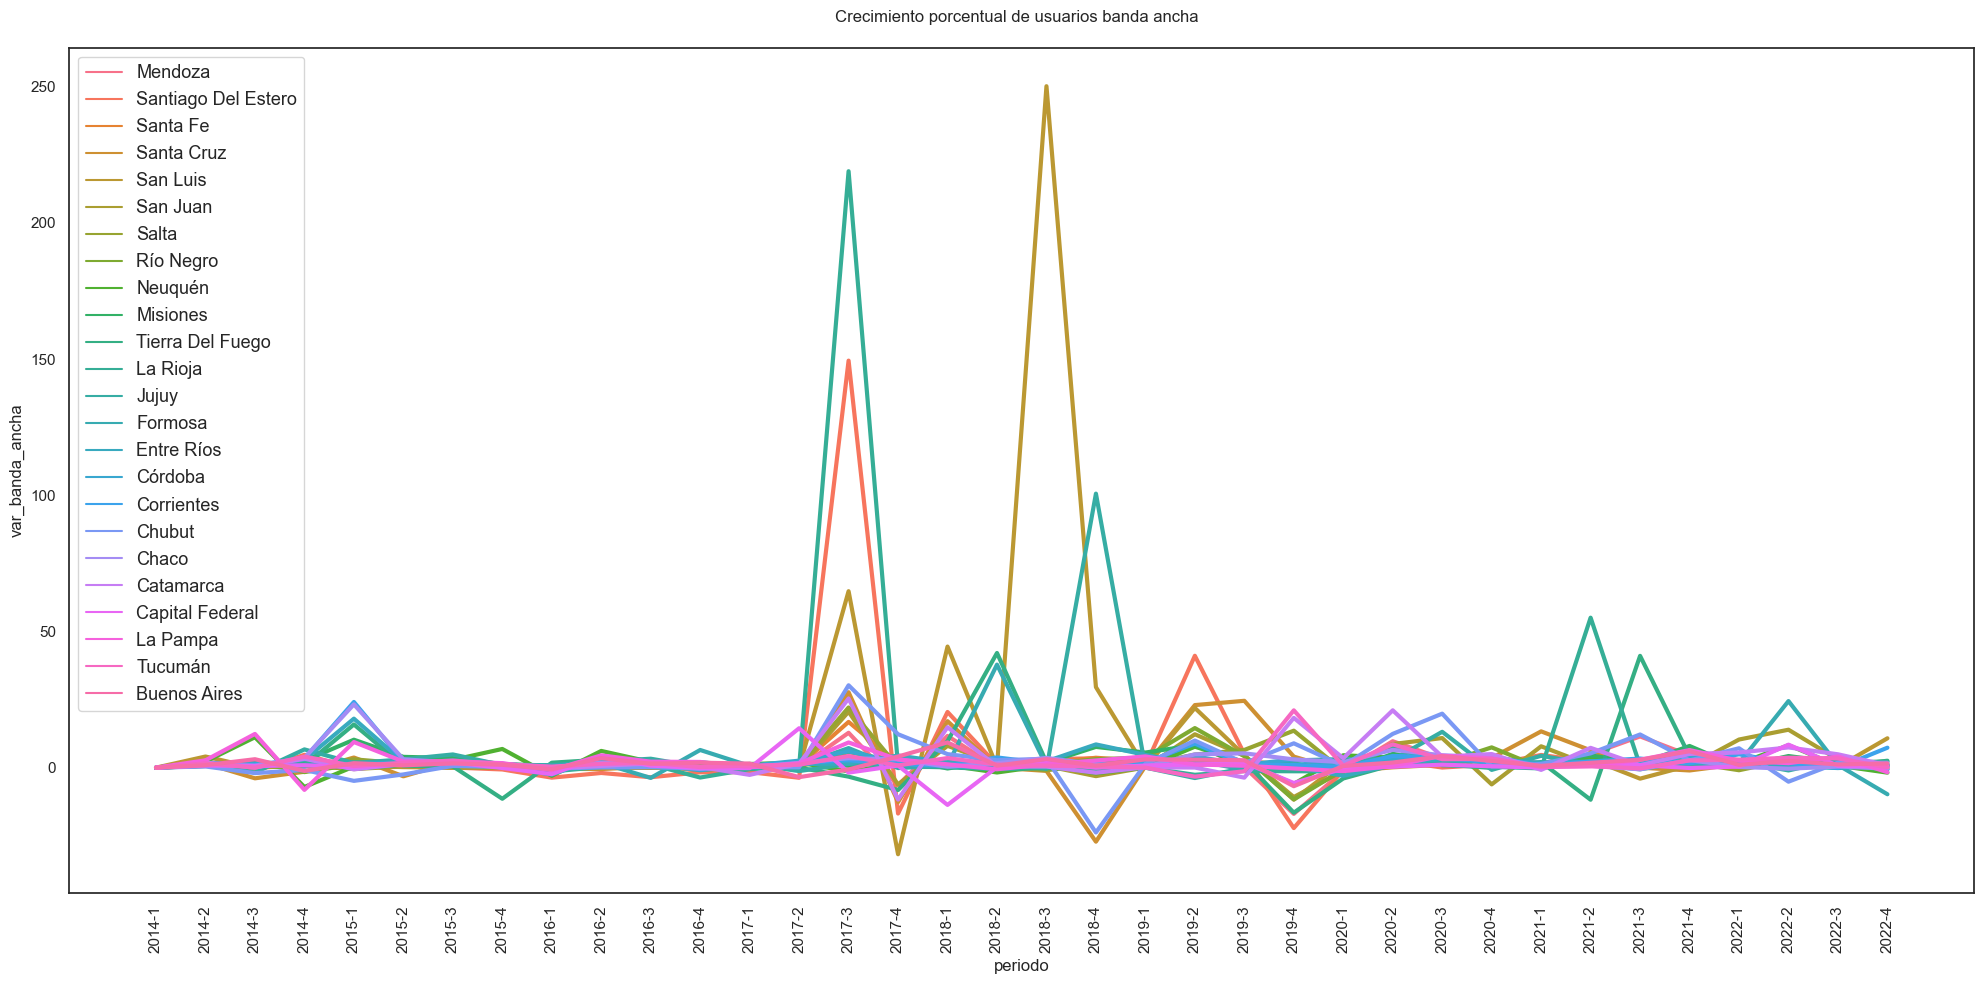

In [93]:
plt.figure(figsize=(20, 10))
sns.set(style="white")
plot = sns.lineplot(x='periodo', y='var_banda_ancha', hue='Provincia', data=crecimiento3,   linewidth = 3)
plt.xticks(rotation= 90)
plt.title("Crecimiento porcentual de usuarios banda ancha  \n")
plt.tight_layout()
plt.legend(fontsize=13)
plt.show()

In [94]:
grouped_data = crecimiento3.groupby(['Provincia']).max().sort_values(by='var_banda_ancha', ascending=False)
grouped_data

,index,periodo,var_banda_ancha
Provincia,,,
San Luis,215,2022-4,250.155896
La Rioja,467,2022-4,218.947821
Santiago Del Estero,107,2022-4,149.418570
Jujuy,539,2022-4,100.587528
Tierra Del Fuego,71,2022-4,42.091558
Formosa,575,2022-4,37.818609
Chubut,719,2022-4,30.238573
Santa Cruz,179,2022-4,27.683616
Catamarca,791,2022-4,25.382137


**Conclusion**

- No salio como esperaba, pero la idea era visualizar que provincia se destaca en su crecimiento porcentual a lo largo de los años.

En principio parece ser que más o menos van todos con el mismo crecimiento porcentual, a diferencia de San Luis, La Rioja, y Santiago del Estero que sufrieron incrementos repentinos. Habria que revisar la validez de la información o si se implementó alguna medida para que se de ese crecimiento puntual

5.1 ETL: Serie trimestral de accesos a Internet fijo por tecnología <br>
Número de accesos al servicio de Internet fijo por tipo de tecnología. Total nacional (trimestral)

In [95]:
data_5 = pd.read_csv('datasets/05-Internet_Accesos-por-tecnologia.csv')
data_5.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [96]:
data_5.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [97]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


5.2 EDA: Serie trimestral de accesos a Internet fijo por tecnología <br>

In [98]:
data_5.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,3.083333,4.166667,193.361111,257.222222,149.500000,8.361111
std,2.618615,1.133893,1.079021,1.253566,239.714968,180.185319,85.497034,1.495761
min,2014.000000,1.000000,1.000000,2.000000,1.000000,71.000000,54.000000,6.000000
25%,2016.000000,1.750000,2.000000,3.000000,2.750000,85.000000,64.250000,7.000000
50%,2018.000000,2.500000,4.000000,4.000000,159.000000,220.000000,116.500000,8.000000
75%,2020.000000,3.250000,4.000000,5.000000,198.250000,415.250000,247.500000,9.250000
max,2022.000000,4.000000,4.000000,6.000000,941.000000,573.000000,265.000000,11.000000


**Observacion**

- Descarto esta tabla, si se trata de Numero de accesos al servicio de Internet Fijo por tipo de tecnologia, 
esto deberia estar en millones, por eso el total dice 11, que se supone que coincide con la tabla anterior.
Por otro lado dije, lo que podria hacer bajo este supuesto es considerar que estan aproximados, seria 1 + 6 +3 +0.5 +0.2, 
te da un aprox de 11 total, por lo cual, podemos jugar por los porcentajes en vez de valores absolutos.

In [99]:
data_5['Wireless']= data_5['Wireless']/1000
data_5['Otros']= data_5['Otros']/1000

In [100]:
data_5.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,0.573,0.222,11,Oct-Dic 2022
1,2022,3,1,6,3,0.557,0.235,11,Jul-Sept 2022
2,2022,2,1,6,3,0.556,0.232,11,Abr-Jun 2022
3,2022,1,2,6,2,0.546,0.252,11,Ene-Mar 2022
4,2021,4,2,6,2,0.523,0.253,10,Oct-Dic 2021


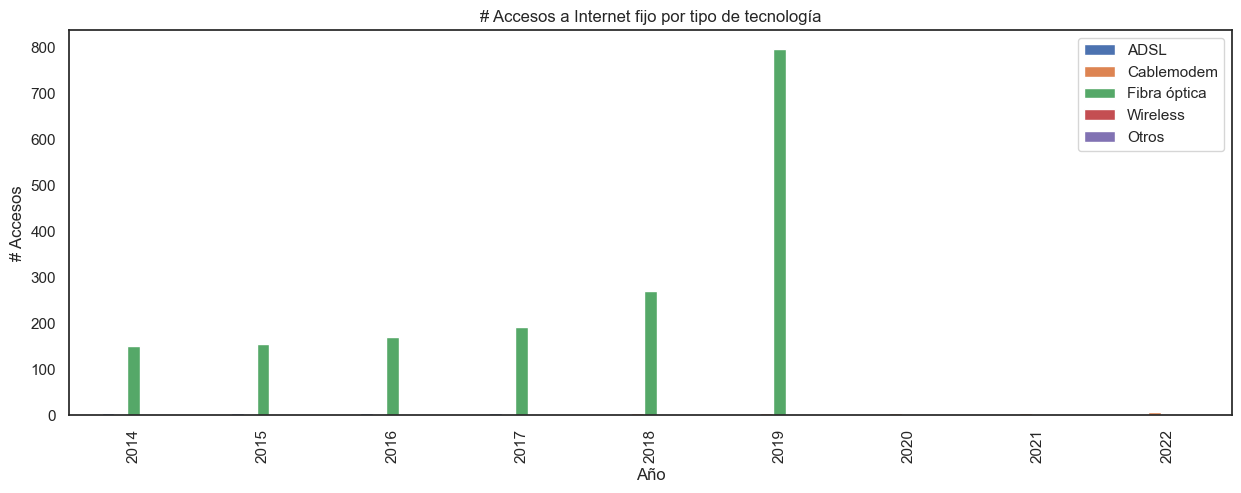

In [101]:
# Agrupamos por año y promediamos los numeros de accesos
agrupado_tipo = data_5.groupby(by='Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].mean()

# Gráfico de barras de los diferentes tipos de tecnologías
ax = agrupado_tipo.plot(kind='bar', figsize=(15, 5))

ax.set_title('# Accesos a Internet fijo por tipo de tecnología')
ax.set_xlabel('Año')
ax.set_ylabel('# Accesos')

plt.show()

In [102]:
data_5.tail()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
31,2015,1,4,3,168,0.079,0.066,7,Ene-Mar 2015
32,2014,4,4,3,150,0.077,0.072,7,Oct-Dic 2014
33,2014,3,4,3,155,0.085,0.070,7,Jul-Sept 2014
34,2014,2,4,2,149,0.072,0.072,6,Abr-Jun 2014
35,2014,1,4,2,150,0.071,0.073,6,Ene-Mar 2014


**Conclusion**
- Descarto por completo, dentro de fibra optica, pasa de 150 a 3, lo cual no es consistente, se ve que hay un tema con los puntos/comas y aproximaciones.

6.1 ETL: Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)<br

In [103]:
data_6 = pd.read_csv('datasets/06-Internet_Accesos-por-tecnologia.csv')
data_6.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


**Conclusion**

- Tiene el mismo problema que la tabla 5, por el momento lo descarto

7.1 ETL - Velocidad Media de bajada de Internet fijo<br>
Serie histórica de la velocidad media de descarga de Internet nacional (trimestral)

In [104]:
data_7 = pd.read_csv('datasets/07-historico_velocidad_internet.csv')
data_7.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,10.656,Oct-Dic 2022
1,2022,3,6.246,Jul-Sept 2022
2,2022,2,5.844,Abr-Jun 2022
3,2022,1,5.511,Ene-Mar 2022
4,2021,4,5.234,Oct-Dic 2021


Obs: La velocidad de conexión a Internet se mide en Mbps (megabits por segundo).  8 Mbps equivalen a 1 MB/s (megabytes por segundo), al igual que 8 megabits equivalen a 1 megabyte.

In [105]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [106]:
data_7['periodo'] = data_7['Año'].map(str) + '-' + data_7['Trimestre'].map(str)

In [107]:
data_7.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
periodo                   0
dtype: int64

In [108]:
data_7['megas']= data_7['Mbps (Media de bajada)']/8

7.2 EDA - Velocidad Media de bajada de Internet fijo<br>

In [109]:
data_7.describe()

,Año,Trimestre,Mbps (Media de bajada),megas
count,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,221.615333,27.701917
std,2.618615,1.133893,275.439068,34.429883
min,2014.000000,1.000000,1.201000,0.150125
25%,2016.000000,1.750000,3.520500,0.440062
50%,2018.000000,2.500000,5.677500,0.709688
75%,2020.000000,3.250000,461.000000,57.625000
max,2022.000000,4.000000,834.000000,104.250000


In [110]:
data_7.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,periodo,megas
0,2022,4,10.656,Oct-Dic 2022,2022-4,1.332000
1,2022,3,6.246,Jul-Sept 2022,2022-3,0.780750
2,2022,2,5.844,Abr-Jun 2022,2022-2,0.730500
3,2022,1,5.511,Ene-Mar 2022,2022-1,0.688875
4,2021,4,5.234,Oct-Dic 2021,2021-4,0.654250


Obs: no se ve consistente 1 mega para el 2022 y tampoco suena a 1332 megas. Los megas maximo llegan a 500 megas

Obs2: Luego de investigar, al parecer el dato es correcto, segun Wikipedia: Una problemática del Internet en la Argentina es que el 4G del país es uno de los 10 más lentos del mundo. El promedio de velocidad de descarga en la Argentina es de 12,53 Mbps
https://es.wikipedia.org/wiki/Internet_en_la_Argentina#:~:text=El%20promedio%20de%20velocidad%20de,(13%2C56%20Mbps).

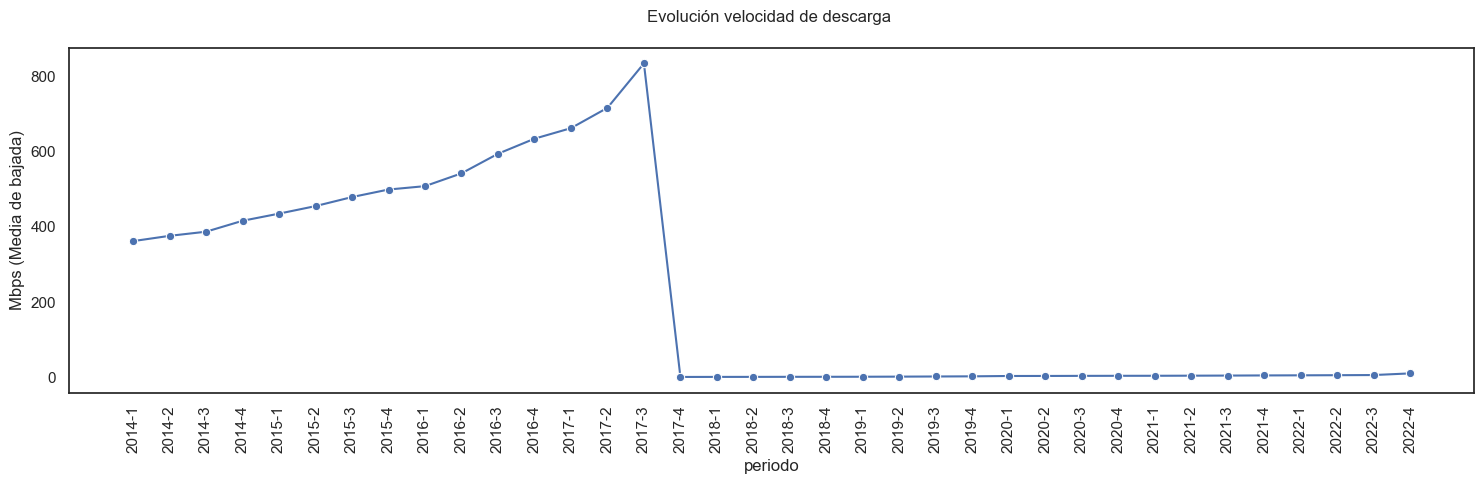

In [111]:
crecimiento_mbp = data_7[['periodo' ,'Mbps (Media de bajada)']].sort_values(by='periodo')
crecimiento_mbp = crecimiento_mbp.set_index('periodo')


# gráfico de línea de evolución del promedio de accesos por año
plt.figure(figsize=(15,5))
sns.lineplot(x=crecimiento_mbp.index, y=crecimiento_mbp['Mbps (Media de bajada)'], marker='o')
plt.xticks(rotation= 90)
plt.title("Evolución velocidad de descarga \n")
plt.tight_layout()
plt.show()

Conclusion:
- Me resulta raro que la velocidad de descarga suba tanto antes del 2017 y luego caiga, ya que a medida que avanza la tecnologia,
la velocidad de acceso es más rapida, con lo cual no resulta consistente la visualización en el tiempo.
Por lo pronto, habria que revisar si hubo un cambio en los datos, y descartar la tabla.

8.1 ETL: Velocidad media de bajada de Internet fijo por provincia<br>

In [112]:
data_8 = pd.read_csv('datasets/08-historico_velocidad_internet.csv')
data_8.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592


In [113]:
data_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [114]:
data_8['periodo'] = data_8['Año'].map(str) + '-' + data_8['Trimestre'].map(str)

In [115]:
data_8.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
periodo                   0
dtype: int64

In [116]:
data_8.sort_values(by='periodo')

,Año,Trimestre,Provincia,Mbps (Media de bajada),periodo
863,2014,1,Tucumán,321.000,2014-1
840,2014,1,Buenos Aires,373.000,2014-1
841,2014,1,Capital Federal,402.000,2014-1
842,2014,1,Catamarca,280.000,2014-1
843,2014,1,Chaco,326.000,2014-1
...,...,...,...,...,...
21,2022,4,Santiago Del Estero,344.000,2022-4
22,2022,4,Tierra Del Fuego,1.348,2022-4
23,2022,4,Tucumán,8.833,2022-4
12,2022,4,Mendoza,3.876,2022-4


In [117]:
#guardo para usar en power bi
tabla_8_1 = "tabla_8.csv"
data_8.to_csv(tabla_8_1, index=False, encoding="utf-8")

8.2 EDA: Velocidad media de bajada de Internet fijo por provincia<br>

In [118]:
grouped_data_8_provincia_año = data_8.groupby(['Provincia','Año'])
grouped_data_8_provincia2_año=grouped_data_8_provincia_año['Mbps (Media de bajada)'].describe()
grouped_data_8_provincia2_año.reset_index()

,Provincia,Año,count,mean,std,min,25%,50%,75%,max
0,Buenos Aires,2014,4.0,393.75000,20.056171,373.000,382.00000,391.0000,402.75000,420.000
1,Buenos Aires,2015,4.0,459.00000,24.899799,432.000,442.50000,458.0000,474.50000,488.000
2,Buenos Aires,2016,4.0,566.75000,59.016241,499.000,531.25000,566.5000,602.00000,635.000
3,Buenos Aires,2017,4.0,558.07425,378.368078,1.297,501.32425,694.0000,750.75000,843.000
4,Buenos Aires,2018,4.0,1.56475,0.140933,1.420,1.45600,1.5730,1.68175,1.693
...,...,...,...,...,...,...,...,...,...,...
211,Tucumán,2018,4.0,235.13375,467.244184,1.351,1.48225,1.5920,235.24350,936.000
212,Tucumán,2019,4.0,2.10725,0.597785,1.657,1.80400,1.8925,2.19575,2.987
213,Tucumán,2020,4.0,3.40575,0.194923,3.225,3.25875,3.3770,3.52400,3.644
214,Tucumán,2021,4.0,4.13850,0.302413,3.798,3.97275,4.1205,4.28625,4.515


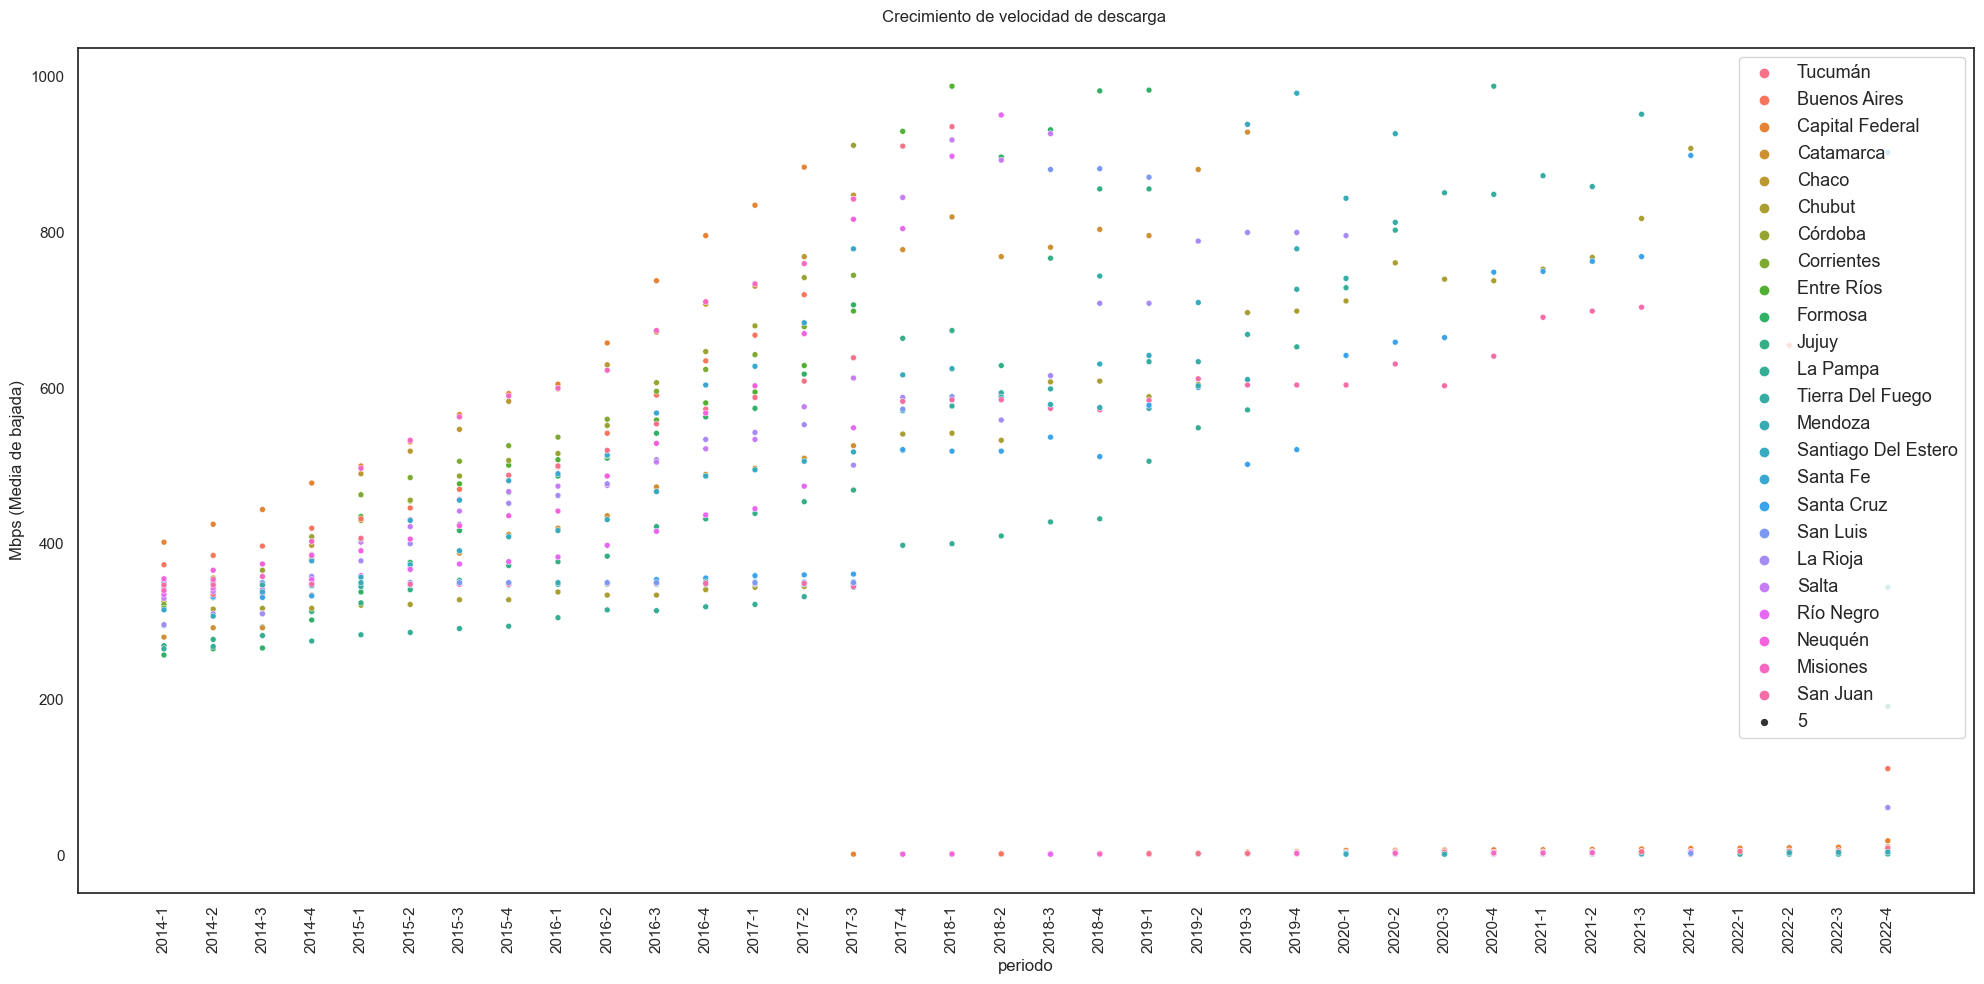

In [119]:
plt.figure(figsize=(20, 10))
sns.set(style="white")
plot = sns.scatterplot(x='periodo', y='Mbps (Media de bajada)', hue='Provincia', data=data_8.sort_values(by='periodo'), size=5)
plt.xticks(rotation= 90)
plt.title("Crecimiento de velocidad de descarga \n")
plt.tight_layout()
plt.legend(fontsize=13)
plt.show()

Conclusión:

- Entre 2014 a 2018 hay un contexto o numeración distinta, ya que en reiteradas provincias pasan de 400 MBPS a 1/10 MBPS.
- Si se quiere utilizar esta tabla, conviene a partir del 2018, de lo contrario descartar o investigar esa diferencia de datos que genera una distorsion importante de los datos.

9.1 ETL: Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible) <br>
Acceso a Internet Fijo por rangos de velocidad de bajada

In [127]:
data_9= pd.read_csv('datasets/09-Internet_Accesos-por-velocidad.csv')
data_9.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114
1,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
2,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
3,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
4,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794


In [128]:
data_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      36 non-null     int64  
 1   Trimestre                36 non-null     int64  
 2   Hasta 512 kbps           36 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   36 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  36 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  36 non-null     object 
 8   Más de 30 Mbps           36 non-null     object 
 9   OTROS                    36 non-null     float64
 10  Total                    36 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.2+ KB


In [129]:
data_9['Hasta 512 kbps'] = data_9['Hasta 512 kbps'].apply(lambda x: x*1000).astype(float)
data_9['Entre 512 Kbps y 1 Mbps'] = data_9['Entre 512 Kbps y 1 Mbps'].apply(lambda x: x*1000).astype(float)
data_9['OTROS'] = data_9['OTROS'].apply(lambda x: x*1000).astype(float)

In [130]:
#hay que convertir los datos a numericos
data_9['Entre 1 Mbps y 6 Mbps'] = data_9['Entre 1 Mbps y 6 Mbps'].str.replace('.', '').astype(float)
data_9['Entre 6 Mbps y 10 Mbps'] = data_9['Entre 6 Mbps y 10 Mbps'].str.replace('.', '').astype(float)
data_9['Entre 10 Mbps y 20 Mbps'] = data_9['Entre 10 Mbps y 20 Mbps'].str.replace('.', '').astype(float)
data_9['Entre 20 Mbps y 30 Mbps'] = data_9['Entre 20 Mbps y 30 Mbps'].str.replace('.', '').astype(float)
data_9['Más de 30 Mbps'] = data_9['Más de 30 Mbps'].str.replace('.', '').astype(float)
data_9['Total'] = data_9['Total'].str.replace('.', '').astype(float)

In [131]:
data_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      36 non-null     int64  
 1   Trimestre                36 non-null     int64  
 2   Hasta 512 kbps           36 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     float64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     float64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     float64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     float64
 8   Más de 30 Mbps           36 non-null     float64
 9   OTROS                    36 non-null     float64
 10  Total                    36 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 3.2 KB


In [132]:
data_9['periodo'] = data_9['Año'].map(str) + '-' + data_9['Trimestre'].map(str)

9.2 EDA: Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible)<br>

In [133]:
data_9['Total2']= data_9['Hasta 512 kbps'] + data_9['Entre 512 Kbps y 1 Mbps'] + data_9['Entre 1 Mbps y 6 Mbps'] + data_9['Entre 6 Mbps y 10 Mbps'] + data_9['Entre 10 Mbps y 20 Mbps'] + data_9['Entre 20 Mbps y 30 Mbps']+ data_9['Más de 30 Mbps'] + data_9['OTROS']

In [134]:
data_9.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Total2
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01,3.600000e+01
mean,2018.000000,2.500000,49571.638889,239046.083333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126059.500000,8.337742e+06,8.337742e+06
std,2.618615,1.133893,52406.958667,198205.544715,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120429.285661,1.504414e+06,1.504414e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06,6.272846e+06
25%,2016.000000,1.750000,28412.500000,74491.750000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06,7.085635e+06
50%,2018.000000,2.500000,38879.500000,216701.500000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06,8.228740e+06
75%,2020.000000,3.250000,41184.000000,389368.250000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07,1.120811e+07


OBs: La suma de todas las variables, es igual al total

In [135]:
data_9.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,periodo,Total2
0,2022,4,31981.0,85668.0,1075272.0,1109421.0,765015.0,335573.0,7410902.0,394282.0,11208114.0,2022-4,11208114.0
1,2022,3,33013.0,96727.0,1161370.0,1151906.0,823505.0,479822.0,6995750.0,349035.0,11091128.0,2022-3,11091128.0
2,2022,2,33667.0,99498.0,1193090.0,1197030.0,856562.0,485321.0,6741922.0,351594.0,10958684.0,2022-2,10958684.0
3,2022,1,34890.0,104840.0,1263273.0,1209148.0,967508.0,509830.0,6336187.0,198333.0,10624009.0,2022-1,10624009.0
4,2021,4,41262.0,28521.0,1413208.0,1245333.0,976539.0,558358.0,6032322.0,194251.0,10489794.0,2021-4,10489794.0


In [136]:
data_9["Hasta 512 kbps_dif"] = data_9['Hasta 512 kbps'].diff().shift(-1)*(-1)
data_9["Entre 512 Kbps y 1 Mbps_dif"] = data_9['Entre 512 Kbps y 1 Mbps'].diff().shift(-1)*(-1)
data_9["Entre 1 Mbps y 6 Mbps_dif"] = data_9['Entre 1 Mbps y 6 Mbps'].diff().shift(-1)*(-1)
data_9["Entre 6 Mbps y 10 Mbps_dif"] = data_9['Entre 6 Mbps y 10 Mbps'].diff().shift(-1)*(-1)
data_9["Entre 10 Mbps y 20 Mbps_dif"] = data_9['Entre 10 Mbps y 20 Mbps'].diff().shift(-1)*(-1)
data_9["Entre 20 Mbps y 30 Mbps_dif"] = data_9['Entre 20 Mbps y 30 Mbps'].diff().shift(-1)*(-1)
data_9["Más de 30 Mbps_dif"] = data_9['Más de 30 Mbps'].diff().shift(-1)*(-1)
data_9["OTROS_dif"] = data_9['OTROS'].diff().shift(-1)*(-1)


In [137]:
#guardo para usar en power bi
tabla_9_1 = "tabla_9.csv"
data_9.to_csv(tabla_9_1, index=False, encoding="utf-8")

In [138]:
data_9_1=data_9[["periodo","Hasta 512 kbps_dif", "Entre 512 Kbps y 1 Mbps_dif","Entre 1 Mbps y 6 Mbps_dif","Entre 6 Mbps y 10 Mbps_dif", "Entre 10 Mbps y 20 Mbps_dif","Entre 20 Mbps y 30 Mbps_dif","Más de 30 Mbps_dif","OTROS_dif" ]]
data_9_1.head() #tabla de diferencias

,periodo,Hasta 512 kbps_dif,Entre 512 Kbps y 1 Mbps_dif,Entre 1 Mbps y 6 Mbps_dif,Entre 6 Mbps y 10 Mbps_dif,Entre 10 Mbps y 20 Mbps_dif,Entre 20 Mbps y 30 Mbps_dif,Más de 30 Mbps_dif,OTROS_dif
0,2022-4,-1032.0,-11059.0,-86098.0,-42485.0,-58490.0,-144249.0,415152.0,45247.0
1,2022-3,-654.0,-2771.0,-31720.0,-45124.0,-33057.0,-5499.0,253828.0,-2559.0
2,2022-2,-1223.0,-5342.0,-70183.0,-12118.0,-110946.0,-24509.0,405735.0,153261.0
3,2022-1,-6372.0,76319.0,-149935.0,-36185.0,-9031.0,-48528.0,303865.0,4082.0
4,2021-4,1088.0,-12916.0,-1137021.0,149561.0,266417.0,21994.0,1084148.0,30982.0


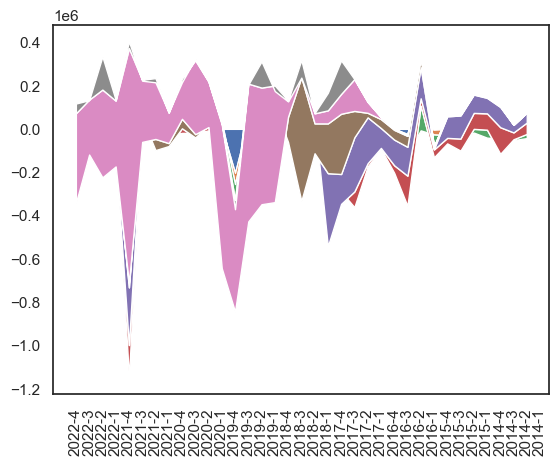

In [139]:
fig, ax = plt.subplots()

ax.stackplot(data_9_1['periodo'].values, data_9_1.drop('periodo',axis=1).T)
plt.xticks(rotation= 90)
plt.show()


In [140]:
data_9_2=data_9_1.set_index('periodo')
data_9_2.head()

,Hasta 512 kbps_dif,Entre 512 Kbps y 1 Mbps_dif,Entre 1 Mbps y 6 Mbps_dif,Entre 6 Mbps y 10 Mbps_dif,Entre 10 Mbps y 20 Mbps_dif,Entre 20 Mbps y 30 Mbps_dif,Más de 30 Mbps_dif,OTROS_dif
periodo,,,,,,,,
2022-4,-1032.0,-11059.0,-86098.0,-42485.0,-58490.0,-144249.0,415152.0,45247.0
2022-3,-654.0,-2771.0,-31720.0,-45124.0,-33057.0,-5499.0,253828.0,-2559.0
2022-2,-1223.0,-5342.0,-70183.0,-12118.0,-110946.0,-24509.0,405735.0,153261.0
2022-1,-6372.0,76319.0,-149935.0,-36185.0,-9031.0,-48528.0,303865.0,4082.0
2021-4,1088.0,-12916.0,-1137021.0,149561.0,266417.0,21994.0,1084148.0,30982.0


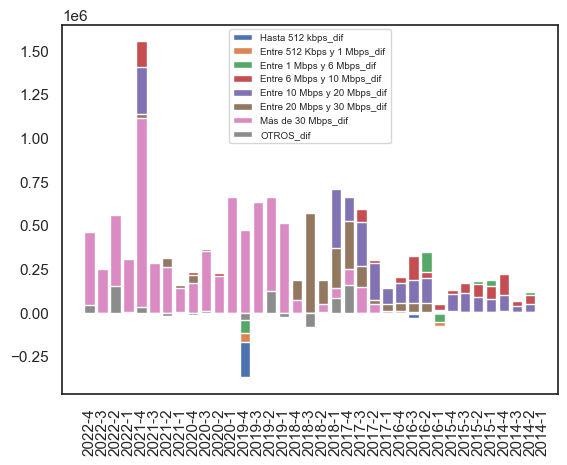

In [144]:


plt.bar(data_9_2.index, data_9_2['Hasta 512 kbps_dif'] + data_9_2['Entre 512 Kbps y 1 Mbps_dif'] + data_9_2['Entre 1 Mbps y 6 Mbps_dif'] + data_9_2['Entre 6 Mbps y 10 Mbps_dif']  + data_9_2['Entre 10 Mbps y 20 Mbps_dif']  + data_9_2['Entre 20 Mbps y 30 Mbps_dif']  + data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Hasta 512 kbps_dif')
plt.bar(data_9_2.index, data_9_2['Entre 512 Kbps y 1 Mbps_dif'] + data_9_2['Entre 1 Mbps y 6 Mbps_dif'] + data_9_2['Entre 6 Mbps y 10 Mbps_dif']  + data_9_2['Entre 10 Mbps y 20 Mbps_dif']  + data_9_2['Entre 20 Mbps y 30 Mbps_dif']  + data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Entre 512 Kbps y 1 Mbps_dif')
plt.bar(data_9_2.index, data_9_2['Entre 1 Mbps y 6 Mbps_dif'] + data_9_2['Entre 6 Mbps y 10 Mbps_dif']  + data_9_2['Entre 10 Mbps y 20 Mbps_dif']  + data_9_2['Entre 20 Mbps y 30 Mbps_dif']  + data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Entre 1 Mbps y 6 Mbps_dif')
plt.bar(data_9_2.index, data_9_2['Entre 6 Mbps y 10 Mbps_dif']  + data_9_2['Entre 10 Mbps y 20 Mbps_dif']  + data_9_2['Entre 20 Mbps y 30 Mbps_dif']  + data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Entre 6 Mbps y 10 Mbps_dif')
plt.bar(data_9_2.index, data_9_2['Entre 10 Mbps y 20 Mbps_dif']  + data_9_2['Entre 20 Mbps y 30 Mbps_dif']  + data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Entre 10 Mbps y 20 Mbps_dif')
plt.bar(data_9_2.index, data_9_2['Entre 20 Mbps y 30 Mbps_dif']  + data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Entre 20 Mbps y 30 Mbps_dif')
plt.bar(data_9_2.index, data_9_2['Más de 30 Mbps_dif']  + data_9_2['OTROS_dif'], label='Más de 30 Mbps_dif')
plt.bar(data_9_2.index, data_9_2['OTROS_dif'], label='OTROS_dif')

plt.legend(loc='best', fontsize=7)
plt.xticks(rotation= 90)
plt.show()

**Conclusion**

- La idea es mostrar que la diferencia de los velocidades en algunos casos es porque se migra a otras velocidades, por ejemplo en el 2022/4, el total acumulado es positivo , porque su crecimiento es igual o superior a las demas velocidades.

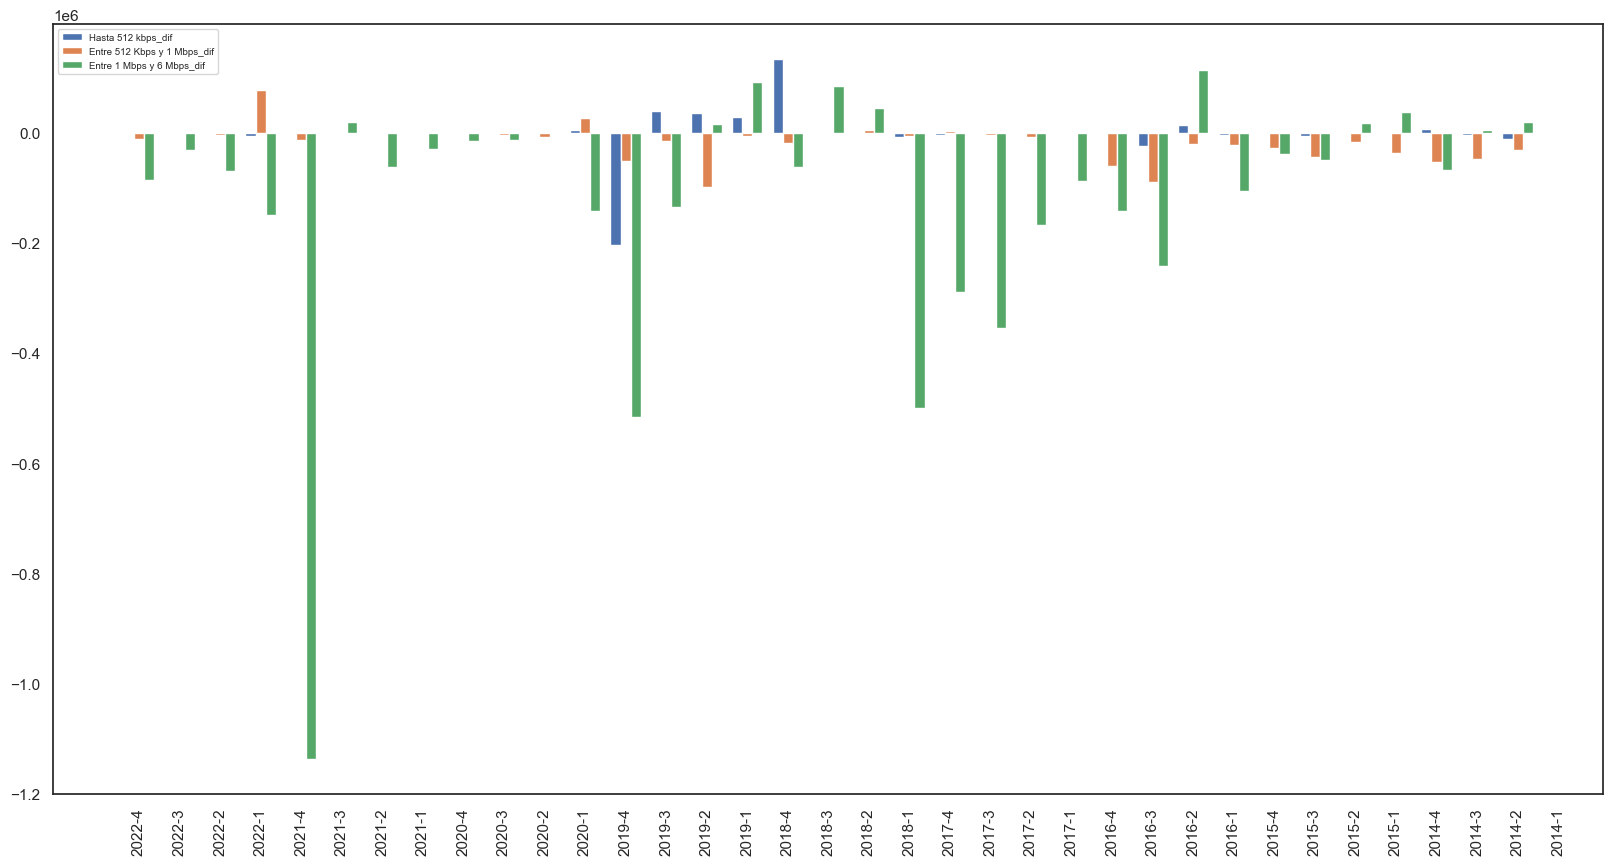

In [145]:
#vamos a probar otro tipo de grafico
n = len(data_9_2.index)
x = np.arange(n)
width = 0.25

plt.figure(figsize=(20, 10))

plt.bar((x - width), data_9_2['Hasta 512 kbps_dif'], width=width, label='Hasta 512 kbps_dif')
plt.bar(x, data_9_2['Entre 512 Kbps y 1 Mbps_dif'] , width=width, label='Entre 512 Kbps y 1 Mbps_dif')
plt.bar(x +  width, data_9_2['Entre 1 Mbps y 6 Mbps_dif'] , width=width, label='Entre 1 Mbps y 6 Mbps_dif')

plt.legend(loc='best', fontsize=7 )
plt.xticks(x, data_9_2.index, rotation= 90)
plt.show()

In [146]:
#Vamos a mostrar un periodo
data_9_3= data_9_1[data_9_1['periodo'] == '2022-4']
data_9_3.head()

,periodo,Hasta 512 kbps_dif,Entre 512 Kbps y 1 Mbps_dif,Entre 1 Mbps y 6 Mbps_dif,Entre 6 Mbps y 10 Mbps_dif,Entre 10 Mbps y 20 Mbps_dif,Entre 20 Mbps y 30 Mbps_dif,Más de 30 Mbps_dif,OTROS_dif
0,2022-4,-1032.0,-11059.0,-86098.0,-42485.0,-58490.0,-144249.0,415152.0,45247.0


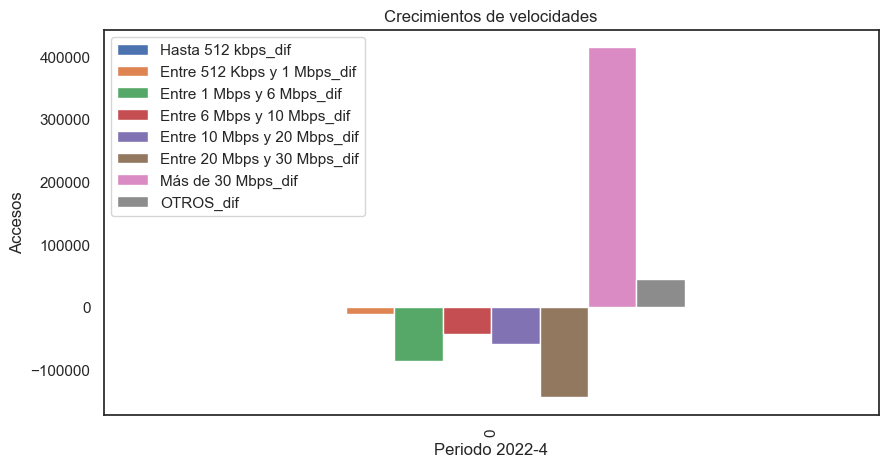

In [147]:
# Gráfico de barras de los diferentes tipos de velocidades
ax = data_9_3.plot(kind='bar', figsize=(10, 5))

ax.set_title('Crecimientos de velocidades')
ax.set_xlabel('Periodo 2022-4')
ax.set_ylabel('Accesos')

plt.show()

In [ ]:
data_9_2.head(2)

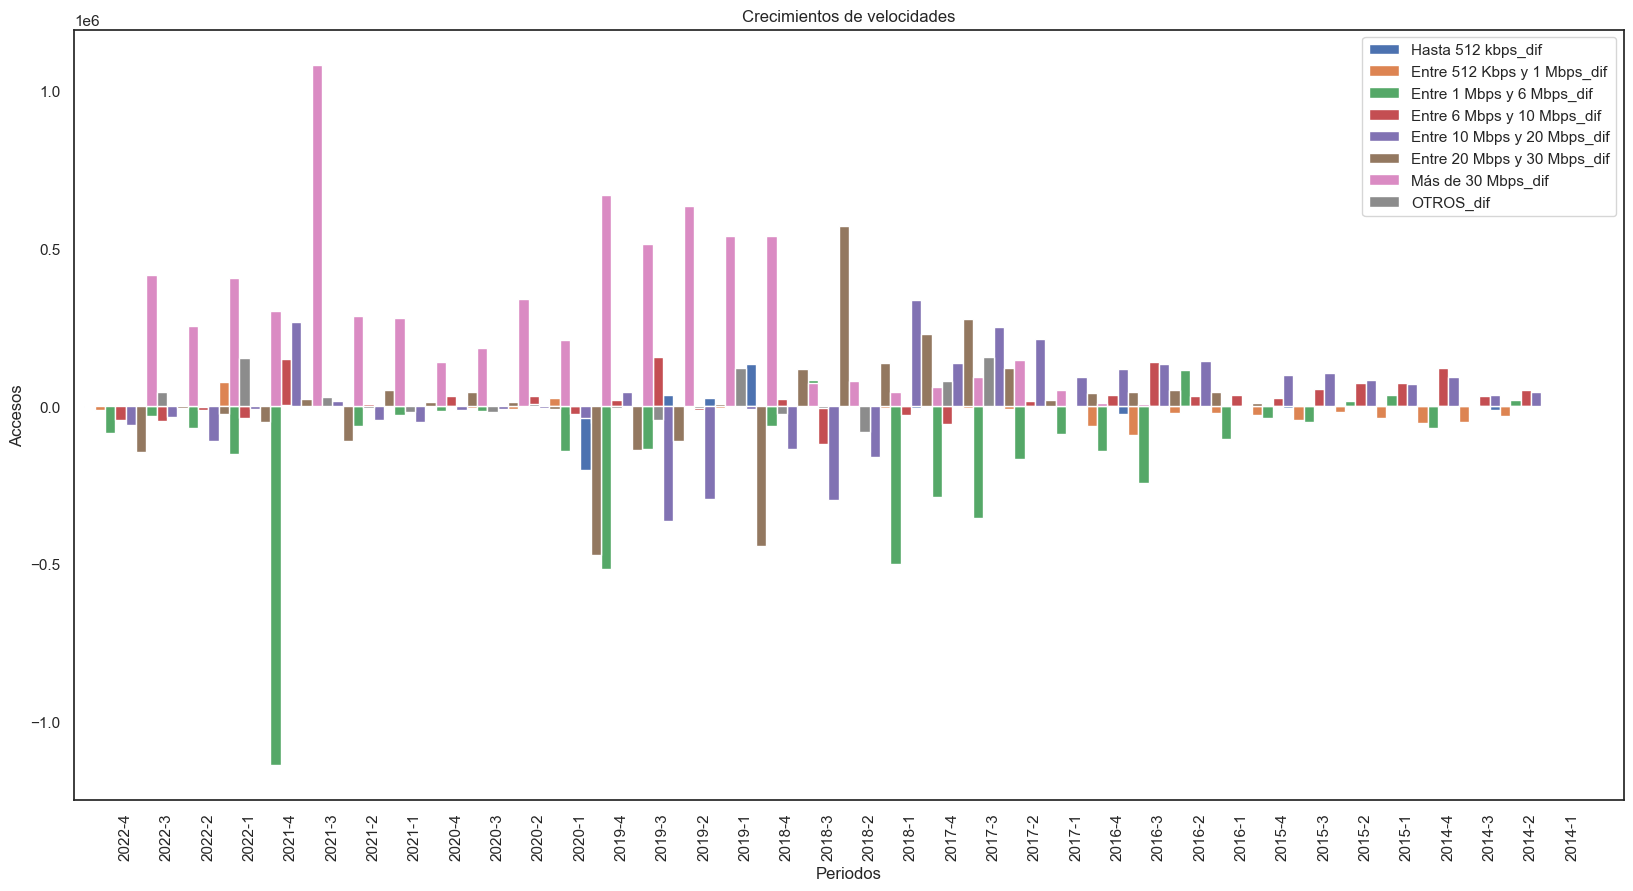

In [148]:
# Gráfico de barras de los diferentes tipos de velocidades
ax = data_9_2.plot(kind='bar',width=2, figsize=(20,10))

ax.set_title('Crecimientos de velocidades')
ax.set_xlabel('Periodos')
ax.set_ylabel('Accesos')

plt.show()

In [149]:
data_9_5= data_9[data_9['Trimestre'] == 4]
data_9_5.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,...,periodo,Total2,Hasta 512 kbps_dif,Entre 512 Kbps y 1 Mbps_dif,Entre 1 Mbps y 6 Mbps_dif,Entre 6 Mbps y 10 Mbps_dif,Entre 10 Mbps y 20 Mbps_dif,Entre 20 Mbps y 30 Mbps_dif,Más de 30 Mbps_dif,OTROS_dif
0,2022,4,31981.0,85668.0,1075272.0,1109421.0,765015.0,335573.0,7410902.0,394282.0,...,2022-4,11208114.0,-1032.0,-11059.0,-86098.0,-42485.0,-58490.0,-144249.0,415152.0,45247.0
4,2021,4,41262.0,28521.0,1413208.0,1245333.0,976539.0,558358.0,6032322.0,194251.0,...,2021-4,10489794.0,1088.0,-12916.0,-1137021.0,149561.0,266417.0,21994.0,1084148.0,30982.0
8,2020,4,39510.0,42185.0,2622638.0,1073875.0,786595.0,582420.0,4239237.0,185102.0,...,2020-4,9571562.0,-1528.0,-1820.0,-15346.0,33858.0,-12755.0,43853.0,185776.0,-16675.0
12,2019,4,38272.0,28980.0,2792307.0,1046128.0,851619.0,1004083.0,2830746.0,201046.0,...,2019-4,8793181.0,-203441.0,-51619.0,-516830.0,19269.0,45153.0,-137462.0,515848.0,-42421.0
16,2018,4,138740.0,201196.0,3337982.0,882388.0,1472634.0,1688748.0,599579.0,152388.0,...,2018-4,8473655.0,133065.0,-19393.0,-63295.0,22975.0,-134503.0,117056.0,74802.0,-4087.0


In [150]:
#vamos a hacerlo por año
data_9_5["Hasta 512 kbps_dif"] = data_9_5['Hasta 512 kbps'].diff().shift(-1)*(-1)
data_9_5["Entre 512 Kbps y 1 Mbps_dif"] = data_9_5['Entre 512 Kbps y 1 Mbps'].diff().shift(-1)*(-1)
data_9_5["Entre 1 Mbps y 6 Mbps_dif"] = data_9_5['Entre 1 Mbps y 6 Mbps'].diff().shift(-1)*(-1)
data_9_5["Entre 6 Mbps y 10 Mbps_dif"] = data_9_5['Entre 6 Mbps y 10 Mbps'].diff().shift(-1)*(-1)
data_9_5["Entre 10 Mbps y 20 Mbps_dif"] = data_9_5['Entre 10 Mbps y 20 Mbps'].diff().shift(-1)*(-1)
data_9_5["Entre 20 Mbps y 30 Mbps_dif"] = data_9_5['Entre 20 Mbps y 30 Mbps'].diff().shift(-1)*(-1)
data_9_5["Más de 30 Mbps_dif"] = data_9_5['Más de 30 Mbps'].diff().shift(-1)*(-1)
data_9_5["OTROS_dif"] = data_9_5['OTROS'].diff().shift(-1)*(-1)

data_9_5.head(2)

C:\Users\molin\AppData\Local\Temp\ipykernel_20188\3963147633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9_5["Hasta 512 kbps_dif"] = data_9_5['Hasta 512 kbps'].diff().shift(-1)*(-1)
C:\Users\molin\AppData\Local\Temp\ipykernel_20188\3963147633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9_5["Entre 512 Kbps y 1 Mbps_dif"] = data_9_5['Entre 512 Kbps y 1 Mbps'].diff().shift(-1)*(-1)
C:\Users\molin\AppData\Local\Temp\ipykernel_20188\3963147633.py:4: SettingWithCopyWarning: 
A value is t

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,...,periodo,Total2,Hasta 512 kbps_dif,Entre 512 Kbps y 1 Mbps_dif,Entre 1 Mbps y 6 Mbps_dif,Entre 6 Mbps y 10 Mbps_dif,Entre 10 Mbps y 20 Mbps_dif,Entre 20 Mbps y 30 Mbps_dif,Más de 30 Mbps_dif,OTROS_dif
0,2022,4,31981.0,85668.0,1075272.0,1109421.0,765015.0,335573.0,7410902.0,394282.0,...,2022-4,11208114.0,-9281.0,57147.0,-337936.0,-135912.0,-211524.0,-222785.0,1378580.0,200031.0
4,2021,4,41262.0,28521.0,1413208.0,1245333.0,976539.0,558358.0,6032322.0,194251.0,...,2021-4,10489794.0,1752.0,-13664.0,-1209430.0,171458.0,189944.0,-24062.0,1793085.0,9149.0


In [151]:
data_9_5=data_9_5.set_index('periodo')

In [152]:

data_9_5=data_9_5[["Hasta 512 kbps_dif", "Entre 512 Kbps y 1 Mbps_dif","Entre 1 Mbps y 6 Mbps_dif","Entre 6 Mbps y 10 Mbps_dif", "Entre 10 Mbps y 20 Mbps_dif","Entre 20 Mbps y 30 Mbps_dif","Más de 30 Mbps_dif","OTROS_dif" ]]
data_9_5.head(2) #tabla de diferencias


,Hasta 512 kbps_dif,Entre 512 Kbps y 1 Mbps_dif,Entre 1 Mbps y 6 Mbps_dif,Entre 6 Mbps y 10 Mbps_dif,Entre 10 Mbps y 20 Mbps_dif,Entre 20 Mbps y 30 Mbps_dif,Más de 30 Mbps_dif,OTROS_dif
periodo,,,,,,,,
2022-4,-9281.0,57147.0,-337936.0,-135912.0,-211524.0,-222785.0,1378580.0,200031.0
2021-4,1752.0,-13664.0,-1209430.0,171458.0,189944.0,-24062.0,1793085.0,9149.0


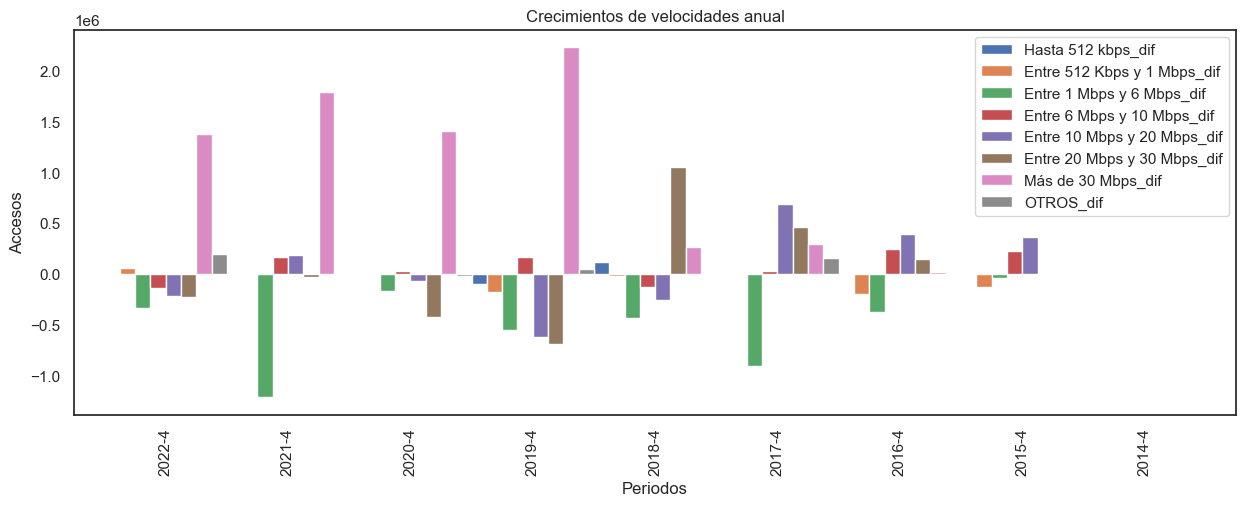

In [153]:
# Gráfico de barras de los diferentes tipos de velocidades anual
ax = data_9_5.plot(kind='bar',width=1, figsize=(15,5))

ax.set_title('Crecimientos de velocidades anual')
ax.set_xlabel('Periodos')
ax.set_ylabel('Accesos')


plt.show()

**Conclusión**

- Aca se puede visualizar mejor por año, como las personas se van cambiando de velocidad. Esto se podria visualizar mejor en Power BI

10.1 ETL: Acceso a Internet Fijo por rangos de velocidad de bajada y provincia<br>
    Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia (trimestral)


In [154]:
data_10 = pd.read_excel('datasets/10.1-Internet_Accesos-por-velocidad.xlsx')
data_10.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,97634.0,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,106772.0,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280.0,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909.0,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,20026.0,168759


In [155]:
data_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    int64  
 4   + 512 Kbps - 1 Mbps  864 non-null    int64  
 5   + 1 Mbps - 6 Mbps    864 non-null    int64  
 6   + 6 Mbps - 10 Mbps   864 non-null    int64  
 7   + 10 Mbps - 20 Mbps  864 non-null    int64  
 8   + 20 Mbps - 30 Mbps  864 non-null    int64  
 9   + 30 Mbps            864 non-null    int64  
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 81.1+ KB


In [156]:
data_10.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.00000,8.640000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5289.20979,3.474059e+05
std,2.583484,1.118682,13459.419781,21992.818099,3.438435e+05,65383.131285,93024.185638,73859.534393,3.635417e+05,13011.53175,7.450600e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.00000,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.00000,5.274050e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.00000,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5146.00000,1.791482e+05
max,2022.000000,4.000000,238920.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.00000,4.794665e+06


In [157]:
data_10['suma']=data_10['HASTA 512 kbps']+data_10['+ 512 Kbps - 1 Mbps']+data_10['+ 1 Mbps - 6 Mbps']+data_10['+ 6 Mbps - 10 Mbps']+data_10['+ 10 Mbps - 20 Mbps']+data_10['+ 20 Mbps - 30 Mbps']+data_10['+ 30 Mbps']+data_10['OTROS']

In [158]:
data_10.head(5)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,suma
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,97634.0,4794665,4794665.0
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,106772.0,1551926,1551926.0
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280.0,70909,70909.0
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909.0,143663,143663.0
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,20026.0,168759,168759.0


In [159]:
data_10.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,suma
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.00000,8.640000e+02,8.580000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5289.20979,3.474059e+05,3.475795e+05
std,2.583484,1.118682,13459.419781,21992.818099,3.438435e+05,65383.131285,93024.185638,73859.534393,3.635417e+05,13011.53175,7.450600e+05,7.465124e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.00000,1.240600e+04,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.00000,5.274050e+04,5.301200e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.00000,1.052355e+05,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5146.00000,1.791482e+05,1.787038e+05
max,2022.000000,4.000000,238920.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.00000,4.794665e+06,4.794665e+06


Ahora si esta ok los formatos de los numeros

In [160]:

data_10['periodo'] = data_10['Año'].map(str) + '-' + data_10['Trimestre'].map(str)

In [161]:
data_10.isna().sum() #Buscamos y sumamos los valores nulos por cada categoria.

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
suma                   6
periodo                0
dtype: int64

In [162]:
# Rellenamoxs nulos de la columna 'OTROS' en 0
data_10.fillna(0, inplace=True)

In [163]:
#guardo para usar en power bi
tabla_10_1 = "tabla_10.csv"
data_10.to_csv(tabla_10_1, index=False, encoding="utf-8")

10.2 EDA:  Acceso a Internet Fijo por rangos de velocidad de bajada y provincia<br>

La tendencia de la tabla 9 mostraba que los usuarios se pasaban a mayores velocidades, lo que se podria ver aca si eso se respeta en todas las provincias y en power bi, cual tiene mayor % de crecimiento.

In [164]:
data_10.sort_values(['Provincia','Año', 'Trimestre'], ascending=False)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,suma,periodo
23,2022,4,Tucumán,39,1562,29996,35425,26369,1375,153538,15118.0,263422,263422.0,2022-4
47,2022,3,Tucumán,39,2047,32571,39018,25214,4348,159600,280.0,263117,263117.0,2022-3
71,2022,2,Tucumán,39,2195,34461,43513,23634,4863,145541,281.0,254527,254527.0,2022-2
95,2022,1,Tucumán,39,2212,36028,46961,21014,5211,133846,273.0,245584,245584.0,2022-1
119,2021,4,Tucumán,39,97,37321,48736,21023,5326,125857,240.0,238639,238639.0,2021-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2015,1,Buenos Aires,8882,123589,2267852,220070,126958,1561,5700,0.0,2754612,2754612.0,2015-1
768,2014,4,Buenos Aires,8226,132937,2250445,203620,104322,997,5406,0.0,2705954,2705953.0,2014-4
792,2014,3,Buenos Aires,7355,128187,2281524,156693,68947,243,4232,0.0,2647181,2647181.0,2014-3
816,2014,2,Buenos Aires,6902,162274,2288772,140226,56549,284,4309,0.0,2659316,2659316.0,2014-2


In [165]:
data_10_1= data_10[data_10['Trimestre'] == 4]
data_10_1=data_10_1.sort_values(['Provincia','Año', 'Trimestre'])

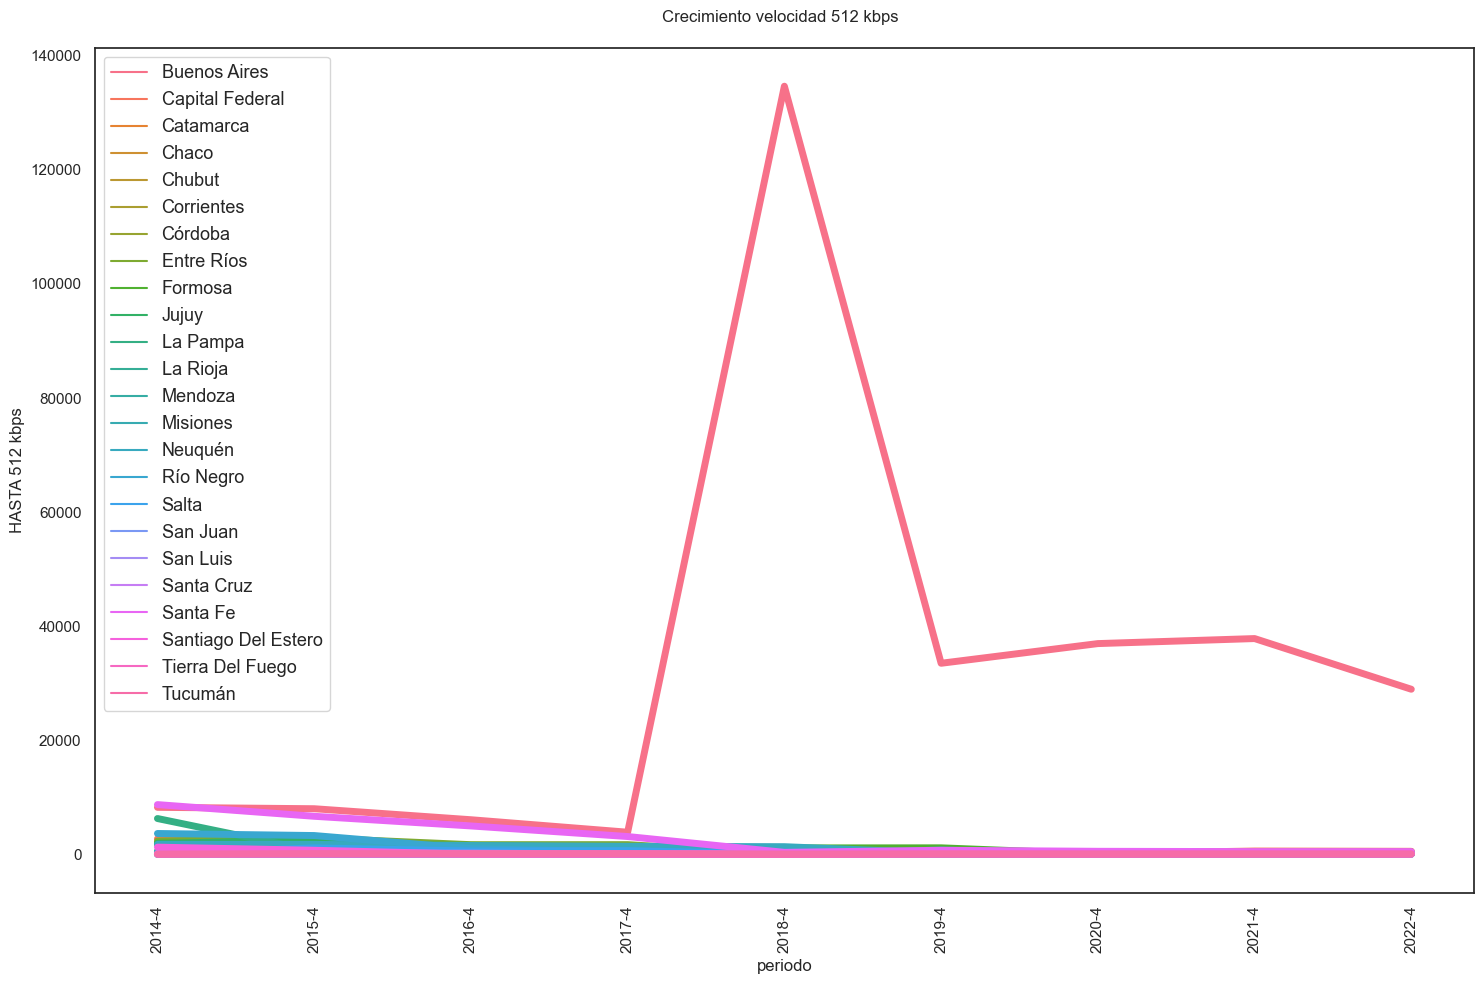

In [166]:
#Vemos que pasa en la velocidad más baja
plt.figure(figsize=(15, 10))
sns.set(style="white")
plot = sns.lineplot(x='periodo', y='HASTA 512 kbps', hue='Provincia', data=data_10_1,   linewidth = 5)
plt.xticks(rotation= 90)
plt.title("Crecimiento velocidad 512 kbps  \n")
plt.tight_layout()
plt.legend(fontsize=13)
plt.show()

In [167]:
agrupado_multiple = data_10_1.groupby('Provincia')['HASTA 512 kbps'].max()
agrupado_multiple.sort_values(ascending=False).head(5)

Provincia
Buenos Aires    134673
Santa Fe          8707
La Pampa          6266
Río Negro         3640
Entre Ríos        2865
Name: HASTA 512 kbps, dtype: int64

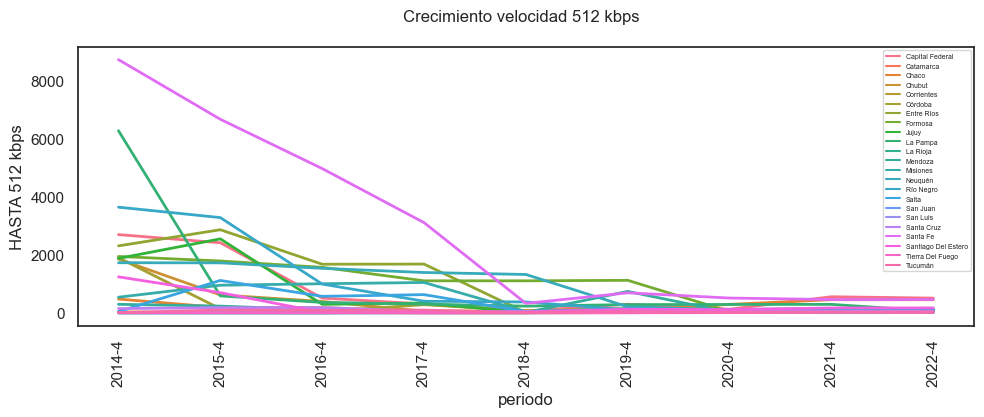

In [168]:
#probemos el grafico nuevamente sin buenos aires, ya sabemos que este es la proxima que mas se expandio en este rango de velocidad
data_10_BA= data_10_1[data_10_1['Provincia'] != 'Buenos Aires']

plt.figure(figsize=(10, 5))
sns.set(style="white")
plot = sns.lineplot(x='periodo', y='HASTA 512 kbps', hue='Provincia', data=data_10_BA,   linewidth = 2)
plt.xticks(rotation= 90)
plt.title("Crecimiento velocidad 512 kbps  \n")
plt.tight_layout()
plt.legend(fontsize=5)
plt.show()

**Conclusión**
- Como era de esperarse, el rango de menor velocidad se encuentra en caida. Ahora veremos si pasa lo mismo con los otros rangos

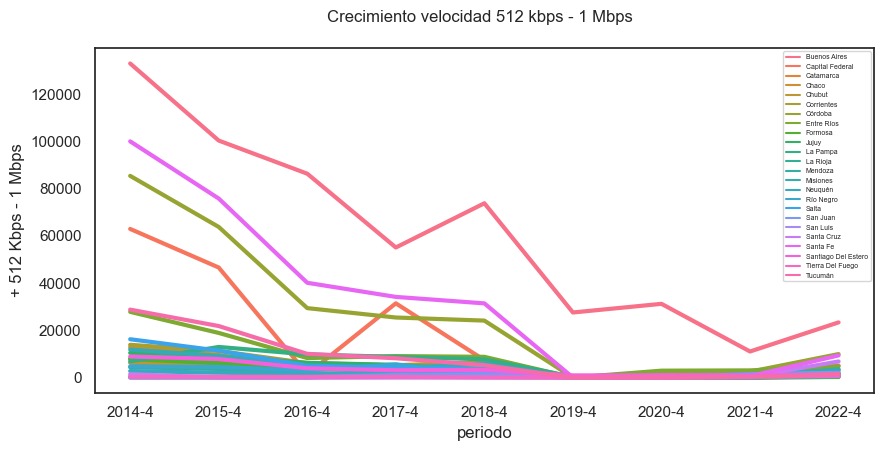

In [169]:
#Vemos que pasa en el segundo rango de velocidad
plt.figure(figsize=(9,5.5))
sns.set(style="white")
plot = sns.lineplot(x='periodo', y='+ 512 Kbps - 1 Mbps', hue='Provincia', data=data_10_1,   linewidth = 3)
#plt.xticks(rotation= 90)
plt.title("Crecimiento velocidad 512 kbps - 1 Mbps  \n")
plt.tight_layout()
plt.legend(fontsize=5)
plt.show()

**Conclusión**
- Todas las provincias caen y hay un pequeño repunte entre el 2021-2022.

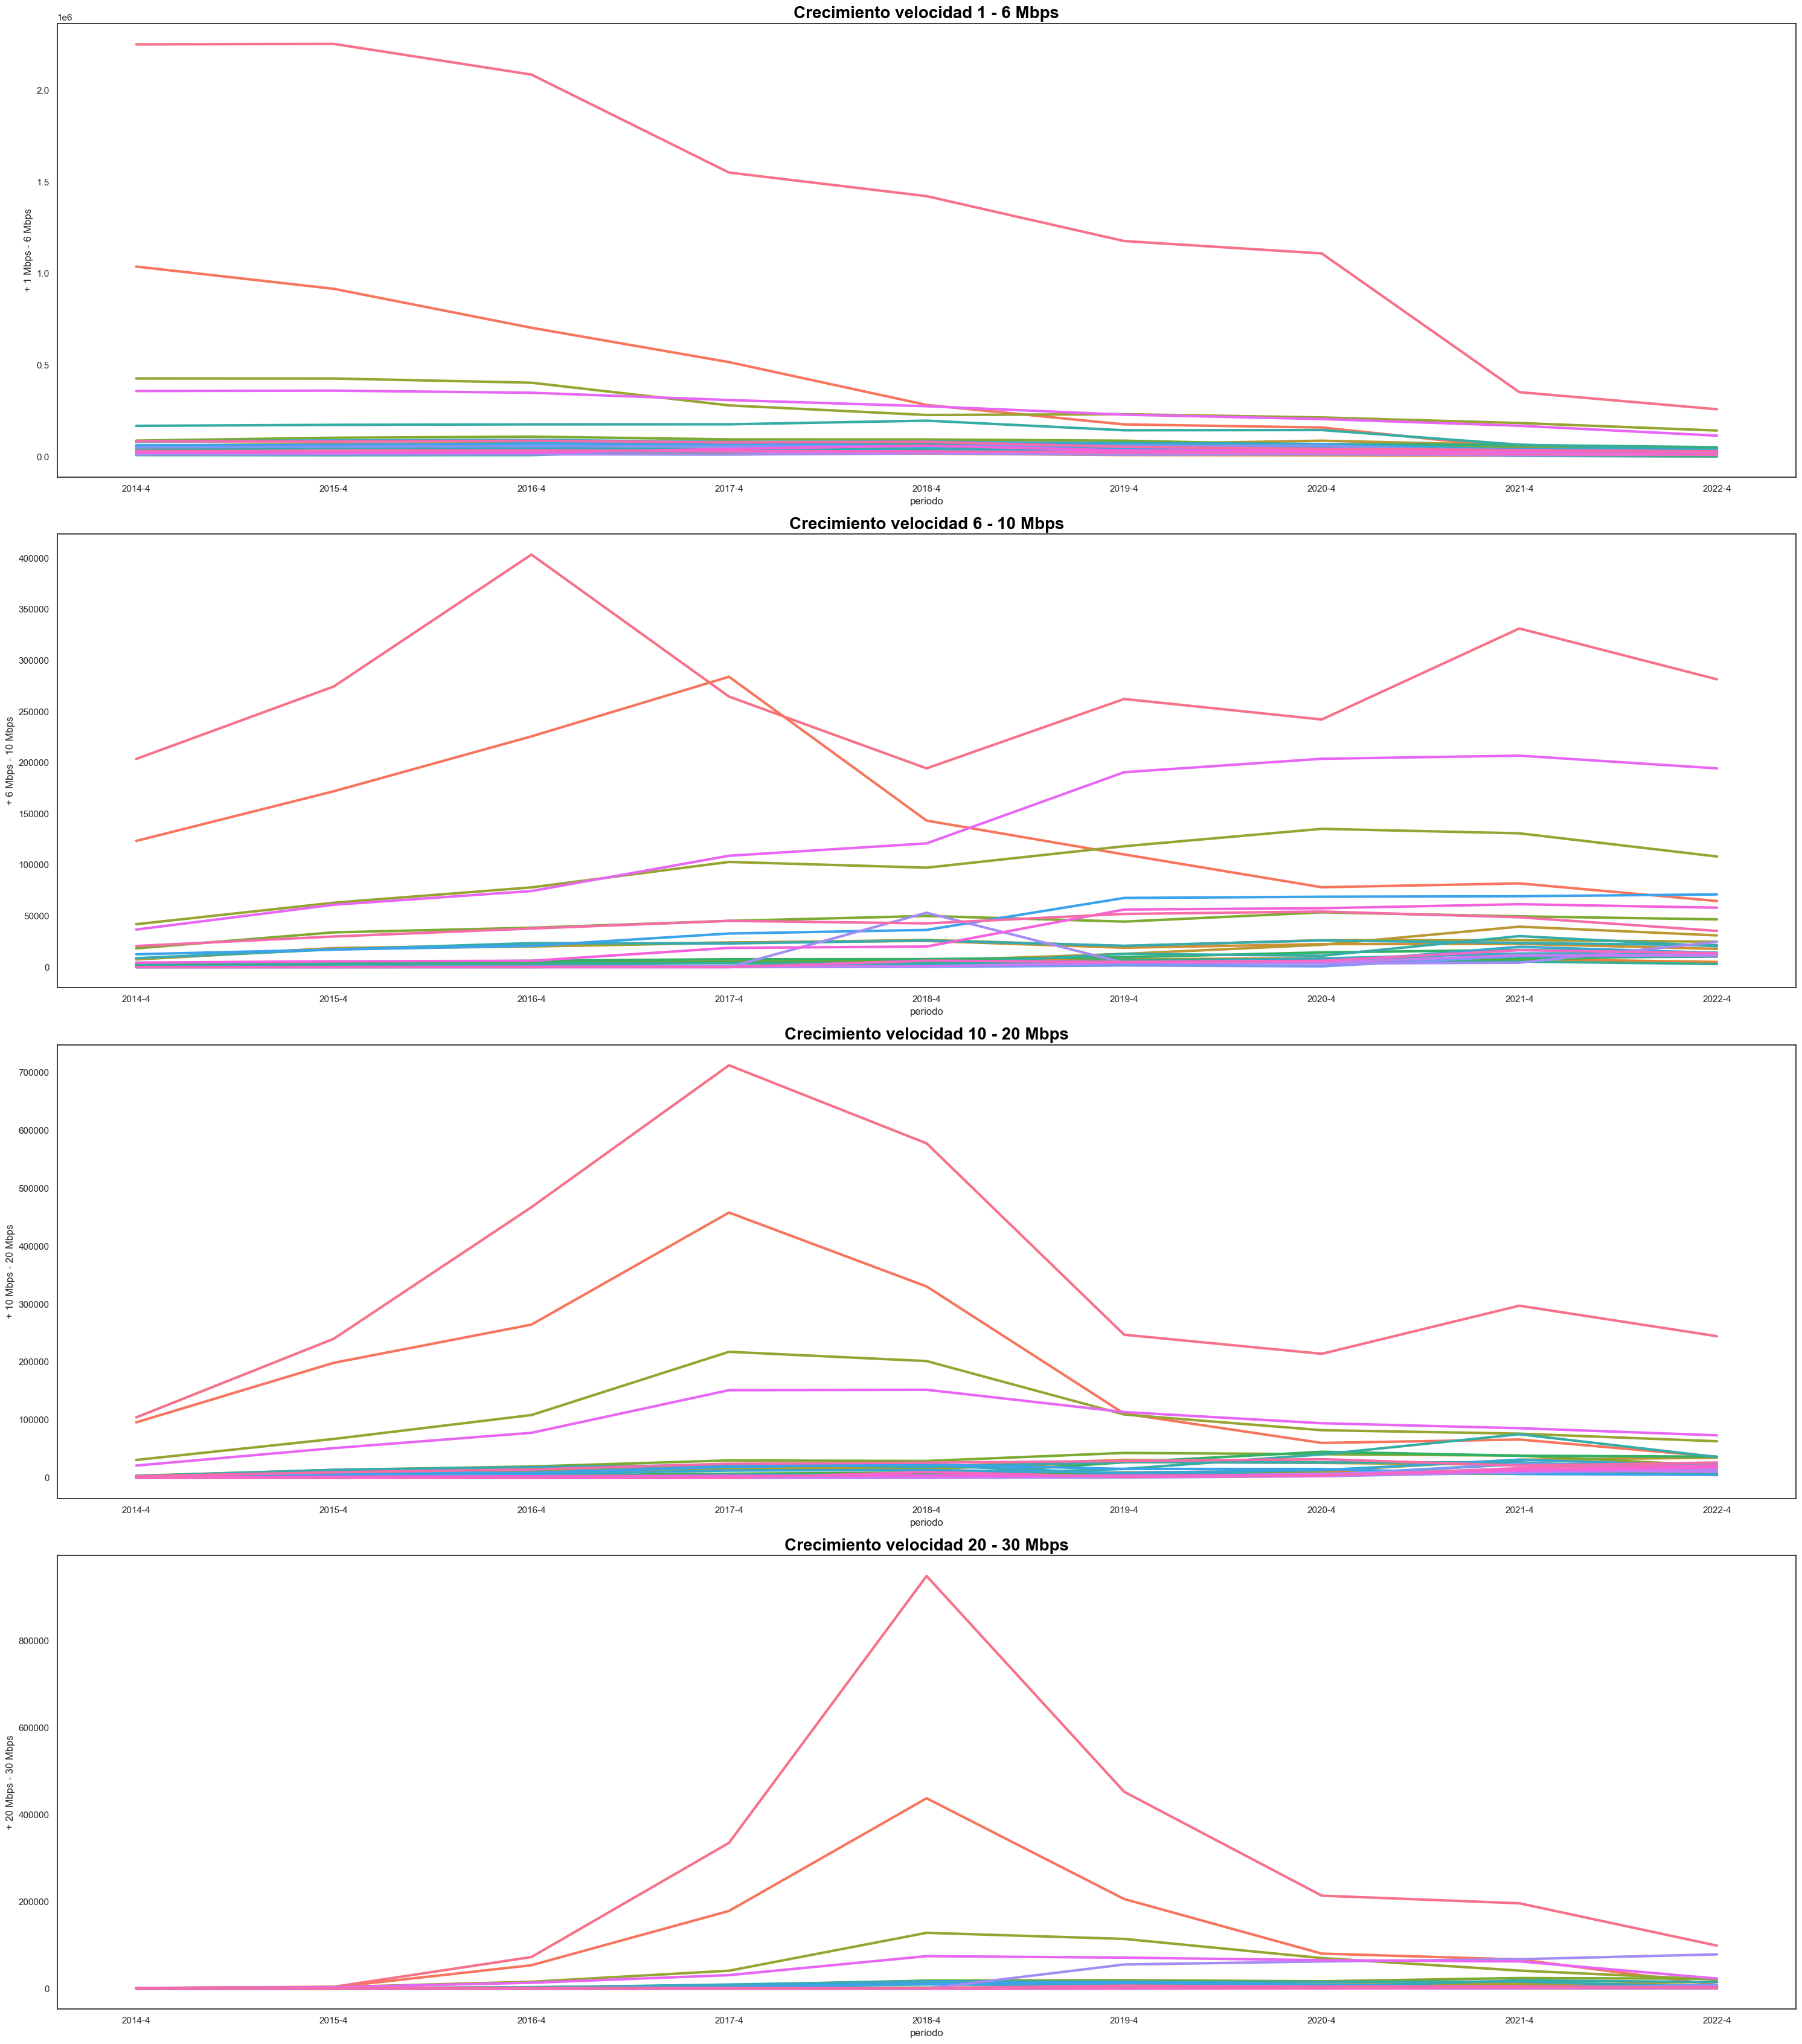

In [170]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,34))


#Vemos que pasa en el segundo rango de velocidad

sns.set(style="white")
plot = sns.lineplot(x='periodo', y='+ 1 Mbps - 6 Mbps', hue='Provincia', data=data_10_1,  linewidth = 3,  legend= False, ax=axes[0])
axes[0].set_title('Crecimiento velocidad 1 - 6 Mbps',fontdict = {'fontsize': 20, # Tamaño
                              'fontweight': 'bold', # Estilo
                              'color': 'black'})


sns.set(style="white")
plot = sns.lineplot(x='periodo', y='+ 6 Mbps - 10 Mbps', hue='Provincia', data=data_10_1,   linewidth = 3 ,legend= False, ax=axes[1])
axes[1].set_title("Crecimiento velocidad 6 - 10 Mbps",fontdict = {'fontsize': 20, # Tamaño
                              'fontweight': 'bold', # Estilo
                              'color': 'black'})

sns.set(style="white")
plot = sns.lineplot(x='periodo', y='+ 10 Mbps - 20 Mbps', hue='Provincia', data=data_10_1,   linewidth = 3 ,legend= False, ax=axes[2])
axes[2].set_title("Crecimiento velocidad 10 - 20 Mbps",fontdict = {'fontsize': 20, # Tamaño
                              'fontweight': 'bold', # Estilo
                              'color': 'black'})


sns.set(style="white")
plot = sns.lineplot(x='periodo', y='+ 20 Mbps - 30 Mbps', hue='Provincia', data=data_10_1,   linewidth = 3, legend= False, ax=axes[3])
axes[3].set_title("Crecimiento velocidad 20 - 30 Mbps",fontdict = {'fontsize': 20, # Tamaño
                              'fontweight': 'bold', # Estilo
                              'color': 'black'})

plt.tight_layout()
plt.show()

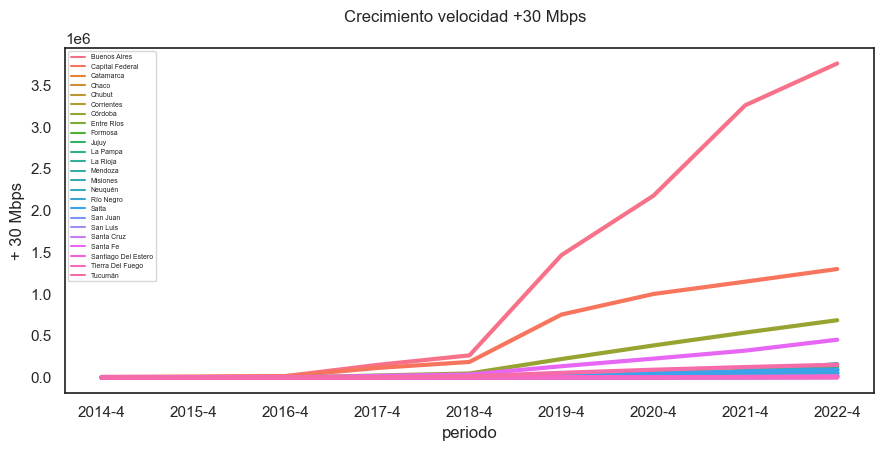

In [171]:
#Vemos que pasa en el ultimo rango
plt.figure(figsize=(9,5.5))
sns.set(style="white")
plot = sns.lineplot(x='periodo', y='+ 30 Mbps', hue='Provincia', data=data_10_1,   linewidth = 3)
#plt.xticks(rotation= 90)
plt.title("Crecimiento velocidad +30 Mbps  \n")
plt.tight_layout()
plt.legend(fontsize=5)
plt.show()

In [172]:
agrupado_multiple2 = data_10_1.groupby('Provincia')['+ 1 Mbps - 6 Mbps'].max()
agrupado_multiple2.sort_values(ascending=False).head(3)

Provincia
Buenos Aires       2253197
Capital Federal    1038269
Córdoba             427844
Name: + 1 Mbps - 6 Mbps, dtype: int64

In [173]:
agrupado_multiple2 = data_10_1.groupby('Provincia')['+ 6 Mbps - 10 Mbps'].max()
agrupado_multiple2.sort_values(ascending=False).head(3)

Provincia
Buenos Aires       403575
Capital Federal    284040
Santa Fe           206856
Name: + 6 Mbps - 10 Mbps, dtype: int64

In [174]:
agrupado_multiple2 = data_10_1.groupby('Provincia')['+ 10 Mbps - 20 Mbps'].max()
agrupado_multiple2.sort_values(ascending=False).head(3)

Provincia
Buenos Aires       712513
Capital Federal    458120
Córdoba            217602
Name: + 10 Mbps - 20 Mbps, dtype: int64

In [175]:
agrupado_multiple2 = data_10_1.groupby('Provincia')['+ 20 Mbps - 30 Mbps'].max()
agrupado_multiple2.sort_values(ascending=False).head(3)

Provincia
Buenos Aires       949093
Capital Federal    437662
Córdoba            128053
Name: + 20 Mbps - 30 Mbps, dtype: int64

In [176]:
agrupado_multiple2 = data_10_1.groupby('Provincia')['+ 30 Mbps'].max()
agrupado_multiple2.sort_values(ascending=False).head(3)

Provincia
Buenos Aires       3760109
Capital Federal    1299117
Córdoba             686330
Name: + 30 Mbps, dtype: int64

**Conclusion**

- Las provincias que se distinguien de las demás por su volumen es Buenos Aires y Capital Federal, esto de todas maneras es
de esperarse dado su densidad poblacional.
- Las velocidades hasta 6 megas tienen una tendencia a la caida, mientras la de 30 megas se va incrementando. Esto tambien es de esperarse, a medida que los costos de internet bajan, el usuario aumenta la calidad de internet.

11.1 ETL: Accesos a Internet fijo por velocidad bajada y provincia (sin rango)  <br>
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia

In [177]:
data_11 = pd.read_excel('datasets/11.1-Accesos_a_Internet_fijo_por_velocidad_bajada_y_provincia.xlsx')
data_11.head(10)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,14.0,0.0,0.0,0.0,5655.0,0.0,90796.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,1.0,0.0,0.0,15.0,0.0,28406.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022.0,4.0,Córdoba,17610.0,2.0,0.0,0.0,87.0,10.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,54.0,0.0
6,2022.0,4.0,Corrientes,7998.0,0.0,0.0,0.0,10.0,57.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022.0,4.0,Entre Ríos,0.0,1.0,0.0,0.0,20.0,86.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022.0,4.0,Formosa,698.0,0.0,0.0,0.0,49.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022.0,4.0,Jujuy,0.0,0.0,0.0,0.0,26.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
data_11=data_11.sort_values(['Provincia','Año', 'Trimestre'],ascending=False)

In [179]:
data_11[data_11['Provincia']=='Buenos Aires'].head(5)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,14.0,0.0,0.0,0.0,5655.0,0.0,90796.0,0.0
24,2022.0,3.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,14.0,0.0,0.0,0.0,5655.0,0.0,90796.0,0.0
48,2022.0,2.0,Buenos Aires,65849.0,19.0,0.0,0.0,30428.0,192.0,4611.0,...,0.0,0.0,10.0,0.0,0.0,0.0,3163.0,0.0,104021.0,0.0
72,2022.0,1.0,Buenos Aires,26280.0,19.0,0.0,0.0,31380.0,192.0,5958.0,...,0.0,0.0,6.0,0.0,0.0,0.0,3163.0,0.0,100884.0,0.0
96,2021.0,4.0,Buenos Aires,22958.0,18.0,0.0,0.0,37635.0,168.0,6898.0,...,0.0,0.0,6.0,0.0,0.0,0.0,3163.0,0.0,98523.0,0.0


In [180]:
data_11.fillna(0, inplace=True)

In [181]:
data_11['Año'] = data_11['Año'].astype(int)
data_11['Trimestre'] = data_11['Trimestre'].astype(int)

In [182]:
data_11.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
23,2022,4,Tucumán,15118.0,0.0,0.0,0.0,19.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47,2022,3,Tucumán,15118.0,0.0,0.0,0.0,19.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
71,2022,2,Tucumán,281.0,0.0,0.0,0.0,19.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
95,2022,1,Tucumán,273.0,0.0,0.0,0.0,19.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
119,2021,4,Tucumán,240.0,0.0,0.0,0.0,19.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


11.2 EDA: Accesos a Internet fijo por velocidad bajada y provincia (sin rango)  <br>

In [183]:
data_11.describe()

,Año,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,2015.857426,2.566337,9114.461386,3.233663,5.346535,2.637624,2486.794059,38.954455,1309.704950,5220.257426,...,1.465347,0.102970,0.168317,0.027723,0.015842,0.007921,59.479208,0.007921,1493.079208,0.007921
std,89.895329,1.142633,16234.518545,11.098086,34.303280,16.922951,17486.911523,73.966932,5166.634987,7841.631708,...,14.667995,0.664648,1.130996,0.164340,0.124986,0.125738,492.368095,0.125738,10308.393806,0.125738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,531.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,891.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,3.000000,3975.000000,0.000000,0.000000,0.000000,47.000000,10.000000,1.000000,2356.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,4.000000,11508.000000,0.000000,0.000000,0.000000,81.000000,57.000000,313.000000,5752.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,4.000000,120987.000000,102.000000,225.000000,111.000000,238902.000000,609.000000,35185.000000,49473.000000,...,148.000000,8.000000,14.000000,1.000000,1.000000,2.000000,5655.000000,2.000000,104021.000000,2.000000


In [184]:
data_11['periodo'] = data_11['Año'].map(str) + '-' + data_11['Trimestre'].map(str)

In [185]:
#guardo para usar en power bi
tabla_11_1 = "tabla_11.csv"
data_11.to_csv(tabla_11_1, index=False, encoding="utf-8")

In [186]:
#dejo solo un dato por año
data_11_1= data_11[data_11['Trimestre'] == 4]
data_11_2 =data_11_1.drop(columns=['Año','Trimestre','Otros'] )

promedios = data_11_2.groupby('periodo')
promedios2=promedios.describe().reset_index()
promedios2.head()

periodo 0,256 Mbps                                                   \
               count      mean        std  min  25%  50%   75%    max   
0  2017-4       24.0  0.000000   0.000000  0.0  0.0  0.0  0.00    0.0   
1  2018-4       24.0  0.000000   0.000000  0.0  0.0  0.0  0.00    0.0   
2  2019-4       24.0  6.875000  21.405632  0.0  0.0  0.0  1.25  102.0   
3  2020-4       24.0  4.750000  12.029854  0.0  0.0  0.0  1.25   51.0   
4  2021-4       24.0  4.041667   9.317954  0.0  0.0  0.0  1.25   32.0   

  0,375 Mbps  ... 75 Mbps          77 Mbps                                     
       count  ...     75%      max   count mean  std  min  25%  50%  75%  max  
0       24.0  ...     0.0      0.0    24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       24.0  ...     0.0      2.0    24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       24.0  ...     0.0     75.0    24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       24.0  ...     0.0  13593.0    24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       24.0  ...     0.0  98523.0    24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 745 columns]

In [187]:
#me quiero quedar solo con la media
parte1=promedios2.iloc[:, [0,2] ]

In [188]:
parte2=promedios2.iloc[:,10:800:8]

In [189]:
parte_total= pd.concat([parte1, parte2], axis=1)
parte_total.head(5)

,periodo,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,2 Mbps","1,25 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,2017-4,0.000000,0.000,0.000,626.708333,0.000000,2645.000000,6583.083333,0.000000,0.000000,...,0.000000,0.000000,0.083333,0.000000,0.000000,0.0,0.375000,0.0,0.000000,0.0
1,2018-4,0.000000,0.000,0.000,5780.833333,0.000000,1740.500000,6642.666667,0.000000,0.000000,...,0.000000,0.041667,0.083333,0.000000,0.000000,0.0,1.250000,0.0,0.083333,0.0
2,2019-4,6.875000,0.000,0.000,1502.041667,85.750000,1207.500000,5764.833333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.041667,0.000000,0.0,0.375000,0.0,3.166667,0.0
3,2020-4,4.750000,9.375,4.625,1590.041667,42.083333,1158.833333,4605.666667,13.583333,1.041667,...,6.166667,0.166667,0.041667,0.041667,0.041667,0.0,49.208333,0.0,762.875000,0.0
4,2021-4,4.041667,9.375,4.625,1658.625000,47.208333,672.125000,3970.250000,0.000000,1.041667,...,0.000000,0.166667,0.250000,0.041667,0.041667,0.0,132.125000,0.0,5430.666667,0.0


In [190]:
parte_total=parte_total.set_index('periodo')

<Axes: xlabel='None-None', ylabel='periodo'>

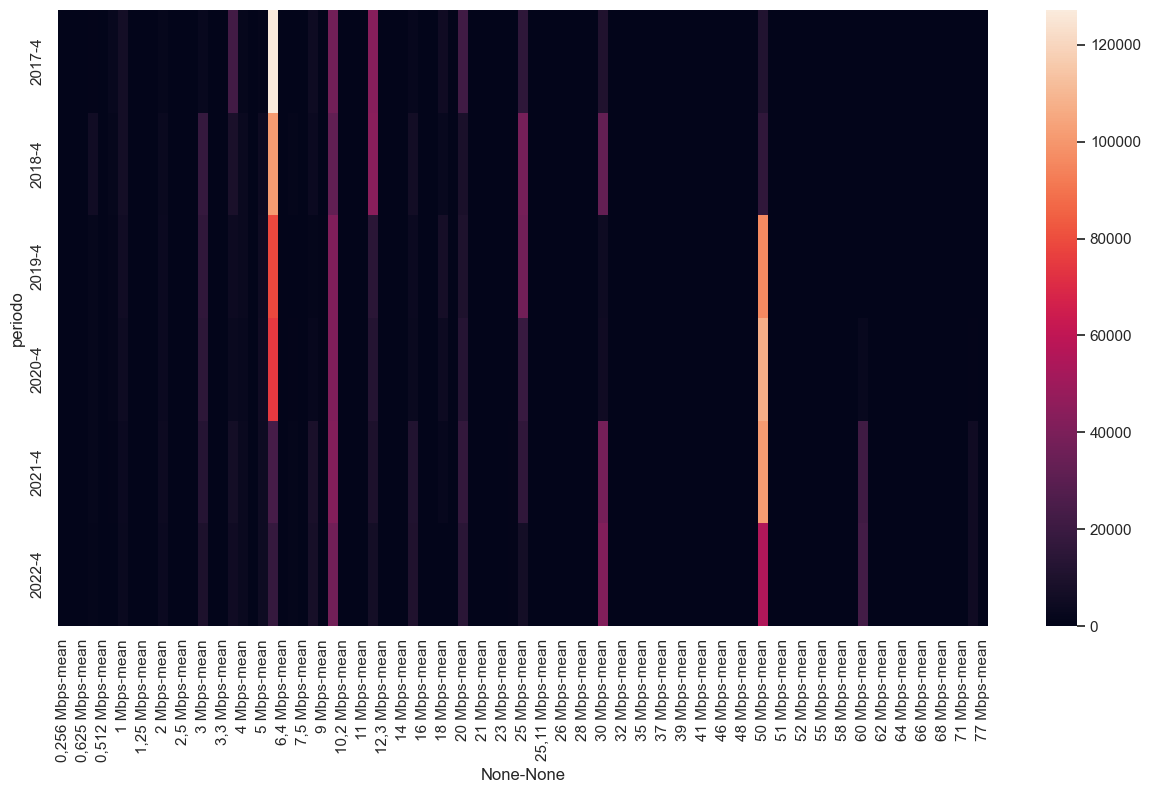

In [191]:
plt.figure(figsize=(15, 8))
sns.heatmap(parte_total, square = False)

In [194]:
#Vamos a verificar, donde más hay en teoria es 50 MBs
parte_total.iloc[:, [70] ]

,50 Mbps
,mean
periodo,
2017-4,11164.541667
2018-4,16179.000000
2019-4,96063.416667
2020-4,107007.583333
2021-4,100994.833333
2022-4,55571.541667


**Conclusion**

- La mayor concentración se encuentra en los 50 megas

12.1 ETL: Ingresos trimestrales de los operadores por el servicio de Internet fijo <br>
Ingresos trimestrales por la prestación del servicio de Internet fijo

In [195]:
data_12 = pd.read_csv('datasets/12-Internet_Ingresos.csv')
data_12.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021


In [196]:
data_12.tail()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
31,2015,1,5,Ene-Mar 2015
32,2014,4,4,Oct-Dic 2014
33,2014,3,3,Jul-Sept 2014
34,2014,2,3,Abr-Jun 2014
35,2014,1,3,Ene-Mar 2014


In [197]:
data_12['periodo'] = data_12['Año'].map(str) + '-' + data_12['Trimestre'].map(str)

In [198]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int64 
 1   Trimestre                  36 non-null     int64 
 2   Ingresos (miles de pesos)  36 non-null     int64 
 3   Periodo                    36 non-null     object
 4   periodo                    36 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


12.2 EDA: Ingresos trimestrales de los operadores por el servicio de Internet fijo <br>

In [199]:
data_12.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,21.888889
std,2.618615,1.133893,19.239510
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.750000,6.750000
50%,2018.000000,2.500000,14.500000
75%,2020.000000,3.250000,32.500000
max,2022.000000,4.000000,72.000000


In [200]:
data_12=data_12.sort_values(by='periodo')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


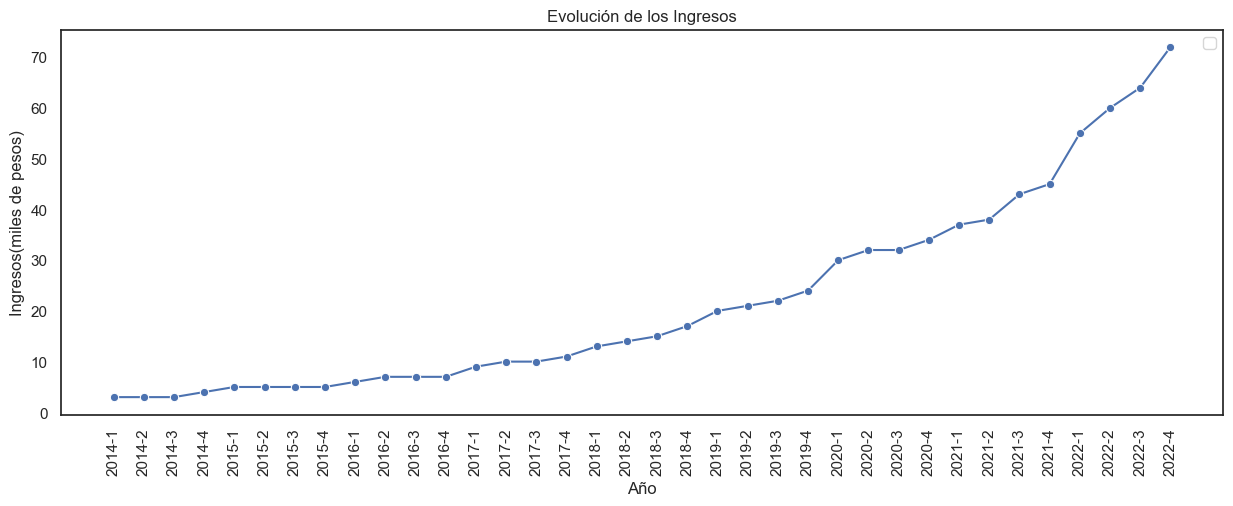

In [201]:
plt.figure(figsize=(15, 5))
sns.lineplot(x= data_12['periodo'], y=data_12['Ingresos (miles de pesos)'], marker= 'o')
plt.title('Evolución de los Ingresos')
plt.xlabel('Año')
plt.ylabel('Ingresos(miles de pesos)')
plt.legend()
plt.xticks(rotation= 90)
plt.show()


**Conclusión**

- No considero esta tabla por dos razones, primero porque no se termina de entender si son 70.000 o 700.000, ya que si son 
11 millones de usuarios, cobrando a 2.000 pesos el servicio, el ingreso seria de 22 millones un solo mes. Por otro lado, en Argentina debido a la inflación, los precios aumentan pero se necesita al mismo tiempo la cantida de usuarios, para verificar si el aumento de ingresos es debido a precio nominal o cantidad de usuarios.

13.1 ETL: Número de accesos al servicio de Internet fijo por velocidad de bajada en cada localidad declarada <br>
Accesos a Internet fijo por velocidad de bajada y localidad

In [202]:
data_13 = pd.read_csv('datasets/13-Accesos_a_Internet_fijo_por_velocidad_de_bajada_y_localidad.csv')
data_13.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
data_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3095 non-null   object 
 1   Partido     3095 non-null   object 
 2   Localidad   3095 non-null   object 
 3   Link Indec  3095 non-null   object 
 4   Otros       962 non-null    float64
 5   0,256 Mbps  28 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    643 non-null    float64
 8   0,512 Mbps  523 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   284 non-null    float64
 11  1 Mbps      891 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    15 non-null     float64
 14  2 Mbps      722 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    4 non-null      float64
 17  3 Mbps      1351 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    373 non-null   

In [204]:
data_13.fillna(0, inplace=True)

In [205]:
data_13.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
data_13.tail()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3091,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,TUCUMAN,Trancas,Villa de Trancas,90112030,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3093,TUCUMAN,Yerba Buena,Villa Carmela,90119020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3094,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,176.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


OBS: Esta tabla no aclara la fecha puntual de analisis

In [207]:
data_11['50 Mbps'].max() # usando la tabla anterior viendo si sumo todos los trimestres

1273506.0

In [208]:
data_11.groupby('Año')['50 Mbps'].max()

Año
0             0.0
2017     124942.0
2018     185927.0
2019    1246405.0
2020    1219329.0
2021    1273506.0
2022    1006534.0
Name: 50 Mbps, dtype: float64

In [209]:
data_13['50 Mbps'].sum()

85922.044

In [218]:
#guardo para usar en power bi
tabla_13_1 = "tabla_13.csv"
data_13.to_csv(tabla_13_1, index=False, encoding="utf-8")

13.2 EDA: Número de accesos al servicio de Internet fijo por velocidad de bajada en cada localidad declarada <br>

Obs: No coincide con ningun año bajo la velocidad 50 megas la tabla 11 con la 13. Podriamos suponer que corresponde al 2023

In [210]:
data_13.groupby('Provincia').agg({'10 Mbps': 'sum','30 Mbps': 'sum','50 Mbps': 'sum','60 Mbps': 'sum'}).reset_index()

,Provincia,10 Mbps,30 Mbps,50 Mbps,60 Mbps
0,BUENOS AIRES,78379.937,15303.695,53020.189,43432.399
1,CABA,47.991,58.801,76.732,105.156
2,CATAMARCA,1246.784,893.000,585.832,0.000
3,CHACO,7688.358,2303.000,441.124,0.000
4,CHUBUT,1416.655,437.230,216.151,0.000
5,CORDOBA,39649.272,2707.666,8538.133,231.727
6,CORRIENTES,5990.298,161.201,69.793,0.000
7,ENTRE RIOS,8943.252,1735.027,2763.301,51.000
8,FORMOSA,2959.196,306.000,946.000,0.000
9,JUJUY,4781.173,305.000,36.578,0.000


Podemos mirar dentro de Buenos Aires, que localidad tiene mas usuarios

In [212]:
data_13_1=data_13.groupby(['Provincia', 'Partido']).agg({'10 Mbps': 'sum','30 Mbps': 'sum','50 Mbps': 'sum','60 Mbps': 'sum'}).reset_index()
data_13_1

,Provincia,Partido,10 Mbps,30 Mbps,50 Mbps,60 Mbps
0,BUENOS AIRES,25 de Mayo,354.000,96.0,1.00,0.0
1,BUENOS AIRES,9 de Julio,91.000,4.0,617.00,0.0
2,BUENOS AIRES,AMBA,0.000,0.0,0.00,0.0
3,BUENOS AIRES,Adolfo Alsina,7.155,25.0,0.00,0.0
4,BUENOS AIRES,Adolfo Gonzales Chaves,167.000,44.0,1.00,0.0
...,...,...,...,...,...,...
531,TUCUMAN,Simoca,0.000,0.0,0.00,0.0
532,TUCUMAN,Tafí Viejo,160.108,53.0,340.00,0.0
533,TUCUMAN,Tafí del Valle,720.000,3.0,4.00,0.0
534,TUCUMAN,Trancas,478.000,0.0,0.00,0.0


In [213]:
BA=data_13_1[data_13_1['Provincia']=='BUENOS AIRES'].set_index('Partido')

In [214]:
max_10=BA['10 Mbps'].max()
BA[BA['10 Mbps']==max_10]

,Provincia,10 Mbps,30 Mbps,50 Mbps,60 Mbps
Partido,,,,,
Almirante Brown,BUENOS AIRES,4169.054,78.914,2040.0,954.641


In [215]:
max_30=BA['30 Mbps'].max()
BA[BA['30 Mbps']==max_30]

,Provincia,10 Mbps,30 Mbps,50 Mbps,60 Mbps
Partido,,,,,
Florencio Varela,BUENOS AIRES,1614.051,1517.196,1626.066,1211.34


In [216]:
max_50=BA['50 Mbps'].max()
BA[BA['50 Mbps']==max_50]

,Provincia,10 Mbps,30 Mbps,50 Mbps,60 Mbps
Partido,,,,,
General San Martín,BUENOS AIRES,2397.36,175.202,5756.151,6592.2


In [217]:
max_60=BA['60 Mbps'].max()
BA[BA['60 Mbps']==max_60]

,Provincia,10 Mbps,30 Mbps,50 Mbps,60 Mbps
Partido,,,,,
General San Martín,BUENOS AIRES,2397.36,175.202,5756.151,6592.2


**Conclusión**

- Se pueden obtener las localidades con mas accesos de cada provincia y asi tambien donde menor hay acceso.
En este caso, Buenos Aires, que tiene más acceso entre todas las provincias, las localidades con mayores accesos son:San Martin, Florencio Varela y Almirante Brown.

14.1 ETL:Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría <br>
Accesos a Internet fijo por tecnología y localidad

In [219]:
data_14 = pd.read_csv('datasets/14-Accesos_a_Internet_fijo_por_tecnologia_y_localidad.csv')
data_14.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [220]:
data_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


In [221]:
#vamos a verificar si coincide con la tabla anterior
BA_tipo=data_14[data_14['Provincia']=='BUENOS AIRES']
BA_tipo['Total general'] = BA_tipo['Total general'].str.replace(',', '.').astype(float)
BA_tipo.head(2)

C:\Users\molin\AppData\Local\Temp\ipykernel_20188\1732508715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA_tipo['Total general'] = BA_tipo['Total general'].str.replace(',', '.').astype(float)


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,6.98,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192.00,NaN


In [222]:
BA_tipo['Total general'].sum()

87582.78

OBS: La suma total de BA seguramente corresponde a algun rango, o a una velocidad especifica, ya que en la tabla anterior
10 megas abarca aprox 800.000 usuarios y 30 megas abarca 153.000 usuarios aprox.

In [223]:
for columna in data_14.columns[4:13]:
    data_14[columna]=  data_14[columna].map(str)
    data_14[columna] = data_14[columna].str.replace('-','' )
    data_14[columna] = data_14[columna].str.replace(',','.' ).astype(float)

data_14 =data_14.drop(columns=['Unnamed: 13'] )

In [224]:
data_14.head(2)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874.0,4.54,0.0,3.0,0.0,852.0,0.0,706.0,6.98
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.0,0.00,0.0,0.0,10.0,1.0,0.0,0.0,192.00


In [225]:
#guardo para usar en power bi
tabla_14_1 = "tabla_14.csv"
data_14.to_csv(tabla_14_1, index=False, encoding="utf-8")

14.2 EDA: Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría <br>

In [226]:
data_14.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,73.777160,38.037274,3.284396,57.125056,16.123752,1.108065,0.691106,89.483121,128.054303
std,185.303675,142.005453,23.237420,162.236972,74.033343,15.515385,14.933928,164.796438,206.753430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,28.350000
75%,6.080000,1.130000,0.000000,7.000000,0.000000,1.000000,0.000000,96.000000,156.000000
max,992.000000,985.000000,537.000000,976.000000,970.000000,852.000000,444.000000,999.000000,992.000000


In [227]:
data_14.groupby('Provincia').agg({'ADSL': 'sum','CABLEMODEM': 'sum','DIAL UP': 'sum','FIBRA OPTICA': 'sum','OTROS': 'sum','SATELITAL': 'sum','WIMAX': 'sum','WIRELESS': 'sum'}).reset_index()

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,78495.59,38090.95,6199.00,58364.24,16135.26,1227.0,1672.0,69465.48
1,CABA,138.75,1.24,2.15,138.55,29.59,95.0,0.0,4.60
2,CATAMARCA,1697.26,44.96,1.00,1401.99,3.15,90.0,0.0,1379.00
3,CHACO,5539.07,2029.30,5.00,6108.22,2490.00,79.0,0.0,7957.00
4,CHUBUT,2017.47,301.70,904.00,3095.73,1425.37,150.0,0.0,5675.08
5,CORDOBA,44395.98,18371.04,68.00,24768.96,4015.12,167.0,61.0,38012.64
6,CORRIENTES,4359.70,1257.10,4.00,1821.95,623.53,86.0,59.0,3089.00
7,ENTRE RIOS,10914.65,5664.21,22.00,6701.14,3946.30,26.0,224.0,16149.28
8,FORMOSA,1184.56,213.87,0.00,1792.34,169.00,58.0,0.0,9869.83
9,JUJUY,2755.14,2047.39,0.00,1988.68,43.08,128.0,0.0,4067.00


In [228]:
data_14.groupby(['Provincia', 'Partido']).agg({'ADSL': 'sum','CABLEMODEM': 'sum','DIAL UP': 'sum','FIBRA OPTICA': 'sum','OTROS': 'sum','SATELITAL': 'sum','WIMAX': 'sum','WIRELESS': 'sum'}).reset_index()

,Provincia,Partido,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,25 de Mayo,1689.00,786.54,0.0,9.00,177.0,853.0,0.0,1227.0
1,BUENOS AIRES,9 de Julio,734.31,3.35,83.0,126.23,145.0,1.0,0.0,1355.0
2,BUENOS AIRES,AMBA,0.00,0.00,0.0,0.00,0.0,0.0,0.0,13.0
3,BUENOS AIRES,Adolfo Alsina,780.00,0.00,1.0,660.62,1.0,2.0,0.0,297.0
4,BUENOS AIRES,Adolfo Gonzales Chaves,549.00,0.00,2.0,1597.00,6.0,0.0,0.0,430.0
...,...,...,...,...,...,...,...,...,...,...
522,TUCUMAN,Simoca,0.00,0.00,0.0,0.00,0.0,0.0,0.0,392.0
523,TUCUMAN,Tafí Viejo,328.04,663.00,0.0,384.01,11.0,0.0,0.0,8.0
524,TUCUMAN,Tafí del Valle,158.00,0.00,0.0,419.00,1.0,3.0,0.0,303.0
525,TUCUMAN,Trancas,126.00,0.00,0.0,0.00,33.0,0.0,0.0,414.0


OBS: Los datos de CABA no están bien, la sumatoria de tipos de tecnologia deberia ser superior al millón.

15.1 ETL Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

In [229]:
data_15 = pd.read_csv('datasets/15-Listado_de_localidades_con_conectividada_internet.csv')
data_15.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


Obs: Se puede verificar la tabla 15, con la 14. Ya que esta solo contiene SI/NO, en ese caso la 14 deberia ser mayor a cero o cero si es NO.

In [230]:
data_15.replace({'SI': 1, '--': 0}, inplace=True)
data_15.head(2)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1,0,0,0,1,1,1,0,0
1,BUENOS AIRES,9 de Julio,Carlos María Naón,0,0,0,0,1,1,1,0,0


In [231]:
data_15_provincia=data_15[['Provincia', 'ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']].groupby('Provincia').sum().reset_index()
data_15_provincia

,Provincia,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,356,342,213,463,655,590,551,502,155
1,CABA,48,48,48,48,48,48,48,48,48
2,CATAMARCA,7,1,1,23,57,29,56,34,47
3,CHACO,28,12,1,45,75,44,47,46,42
4,CHUBUT,14,10,15,13,38,31,55,31,49
5,CORDOBA,179,88,5,175,344,277,318,291,73
6,CORRIENTES,21,9,1,12,70,39,51,46,52
7,ENTRE RIOS,47,39,4,48,128,78,130,126,20
8,FORMOSA,13,3,0,16,42,16,31,59,22
9,JUJUY,19,15,0,47,45,28,57,39,44


Obs: Se busco Misiones que no tiene DIAL UP en ninguna tabla, por lo cual ambas son consistentes entre si.

In [232]:
data_15_localidad=data_15[['Provincia','Partido', 'ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']].groupby(['Provincia','Partido']).sum().reset_index()
data_15_localidad

,Provincia,Partido,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,25 de Mayo,4,2,0,3,5,3,7,5,2
1,BUENOS AIRES,9 de Julio,4,1,2,3,8,7,11,6,1
2,BUENOS AIRES,Adolfo Alsina,1,0,1,5,5,2,5,2,1
3,BUENOS AIRES,Adolfo Gonzales Chaves,1,0,1,2,3,3,4,4,0
4,BUENOS AIRES,Alberti,2,0,1,1,4,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
521,TUCUMAN,Simoca,0,0,0,0,3,3,1,5,0
522,TUCUMAN,Tafí Viejo,3,1,0,3,10,8,6,1,0
523,TUCUMAN,Tafí del Valle,1,0,0,1,4,2,4,4,3
524,TUCUMAN,Trancas,1,0,0,0,3,3,2,2,0


Obs: También se hizo una verificación por localidad con 25 de Mayo / Buenos Aires/ Dial Up y coinciden ambas tablas 14 y 15

In [233]:
#guardo para usar en power bi
tabla_15_1 = "tabla_15.csv"
data_15.to_csv(tabla_15_1, index=False, encoding="utf-8")